## Анализ данных компании G

#### Цель проекта:
    Проанализировать имеющиеся данные, составить портреты наиболее типичных клиентов, разобраться в причинах оттока клиентов, предложить решения по их минимизации.Определить ключевые признаки для компаний, наличие которых (или их появление) влияет на отмену (отсутствие оплаты) подписки.

#### Задачи проекта:

1. Провести исследовательский анализ данных;
2. Сформулировать и проверить гипотезы, основываясь на имеющихся признаках;
3. Формулирование выводов по полученным результатам, подготовка презентации.


#### Описание данных:

`Файл активностей (activities.csv)`

Сгруппирован по компаниям, отсортирован по компаниям, а в пределах каждой компании - по месяцам

- `Company_id` - Идентификатор компании
- `Month`  - Отчетный месяц
- `Company-month-billing` - Количество счетов, выставленных в приложении, компанией за месяц
- `Company-month-stocks` - Месячное количество складов (аренда, заказы и т.д.), используемых компанией
- `Company-month-backups` - Месячное количество бэкапов компании
- `Company-month-projects` - Месячное количество проектов компании
- `Company-month-contractors` - Месячное количество контрагентов компании
- `Company-month-resource_orders` - Месячное количество заказов материалов компании

`Файл платежей (billing.csv)`

- `Unnamed:0` - Старый индекс	Использовать как индекс – index_col=0 при загрузке датасета
- `User_id` - Идентификатор пользователя
- `Company_id` - Идентификатор компании пользователя
- `Billing_tariff_id` - Тарифный план	 тарифы 1, 18, 22 - тестовые, бесплатные и пробные. Если такие есть - при анализе не должны использоваться. для остальных тарифов - основное различие - разное количество пользователей

     - тарифы 4, 7, 8, 11, 19 - группа “старт”
     - тарифы 2, 17 - группа “базовый”
     - тарифы 9, 20 - группа “бизнес”
     - тарифы 3, 10, 13, 21 - группа “Профи”
     - тариф 6 - “архивный”, в настоящее время не используется

- `Payed_until` - Дата, до которой подписка компании действует
- `Is_payed` - Статус оплаты
- `Created_at` - Дата создания
- `Updated_at` - Дата обновления
- `Billing_tariff_price_id` -id стоимости тарифа	в разное время или для разных клиентов  один и тот же тариф может стоить по-разному
- `Comment` - Комментарии
- `Pay_date` - Дата платежа

`Файл компаний (companies.csv)`

- `Id`- id компании
- `Working_direction` - сфера деятельности
- `Employer_count_interval` - id количества сотрудников	 По возрастающей id от 1 до 8, количество сотрудников - (1-4, 5-10, 11-20, 21-30, 31-50, 51-100, 101-200, >201)
- `Created_at` - дата создания компании в системе
- `Updated_at` - дата обновления информации о компании
- `Billing_tariff_id` - id тарифа 	 см. выше
- `Billing_is_over` - истекла ли оплата

`Файл сотрудников (people.csv)`

- `Id`	индекс
- `Company_id`- id компании
- `User_id` - id пользователя
- `Role_id`	 id роли (должности)
- `Created_at` -  дата создания пользователя
- `Updated_at` - дата обновления информации о пользователе
- `Is_deleted` - удален ли пользователь
- `Deleted_at` - дата удаления


#### План работы над проектом:

1. Загрузить данные
2. Предобработать данные
3. Провести исследовательский анализ данных
4. Сформулировать выводы
5. Подготовить презентацию


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [73]:
plt.style.use('seaborn-v0_8-colorblind')
sns.set_style('whitegrid')
%matplotlib inline

In [74]:
pd.set_option('display.max_columns', 40)

In [8]:
activities = pd.read_csv('activities.csv',index_col=0)
billing = pd.read_csv('billing.csv',index_col=0)
companies = pd.read_csv('companies.csv',index_col=0)
people = pd.read_csv('people.csv',index_col=0)

### 1. Знакомство с данными

In [9]:
display(activities)

,company_id,month,company-month-billing,company-month-stocks,company-month-backups,company-month-projects,company-month-contractors,company-month-resource_orders
0,1,2019-09-01 00:00:00+00:00,1.0,0.0,0.0,7.0,0.0,0.0
1,1,2019-12-01 00:00:00+00:00,1.0,0.0,0.0,2.0,1.0,0.0
2,1,2020-04-01 00:00:00+00:00,4.0,1.0,0.0,1.0,6.0,0.0
3,1,2020-07-01 00:00:00+00:00,1.0,7.0,3.0,5.0,0.0,0.0
4,21,2020-01-01 00:00:00+00:00,3.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
6552,7882,2023-12-01 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,1.0
6553,8495,2024-02-01 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,1.0
6554,8513,2024-02-01 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,2.0
6555,8603,2023-11-01 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,2.0


In [10]:
display(billing)

,Unnamed: 0,id,user_id,company_id,billing_tariff_id,payed_until,is_payed,created_at,updated_at,billing_tariff_price_id,comment,pay_date
4,4,3050,567,512,3,1640153302,False,1608617302,1608617302,12.0,NaN,NaN
6,6,3051,2861,2474,7,1640131200,True,1608626162,1608626181,23.0,NaN,1.608626e+09
16,16,3059,1902,1645,2,1616577484,False,1608801484,1608801484,6.0,NaN,NaN
18,18,3065,2352,2035,7,1643500799,False,1608883175,1608883175,23.0,NaN,NaN
24,24,3062,1074,926,3,1611964800,True,1608814072,1608899674,9.0,NaN,1.609200e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
14341,14341,14362,14513,10848,2,1742342399,False,1710258814,1710258814,8.0,NaN,NaN
14343,14343,14364,4980,4004,17,1741737600,False,1710263717,1710263729,5.0,NaN,NaN
14344,14344,14365,13378,9841,7,1741824000,False,1710265949,1710266009,23.0,NaN,1.710461e+09
18868,18868,13441,10388,7745,2,1745884800,True,1708074224,1710325318,8.0,"13,03,24 - добавили 3 месяца к подписке из-за ...",1.708042e+09


In [11]:
display(companies)

,id,working_direction,employer_count_interval,created_at,updated_at,billing_tariff_id,billing_is_over
19,514,-,1.0,1571316635,1670298314,4.0,True
57,383,Строительство,2.0,1564142565,1676550050,7.0,False
69,495,-,1.0,1570535695,1598281714,2.0,False
75,724,-,1.0,1579514393,1670298294,4.0,True
99,471,-,1.0,1569328017,1670298360,7.0,True
...,...,...,...,...,...,...,...
11434,7074,-,1.0,1671548145,1709157602,7.0,True
11500,6279,-,3.0,1656313100,1709676001,2.0,True
11547,6256,-,1.0,1655827277,1709848801,7.0,True
15463,5411,-,1.0,1645018850,1710233935,9.0,False


In [12]:
display(people)

,id,company_id,user_id,role_id,created_at,updated_at,is_deleted,deleted_at
2,6601,495,NaN,7133,1570535962,1570535962,True,1.594067e+09
6,7025,1,NaN,1,1594120484,1594120484,True,1.594120e+09
7,7165,1255,1734.0,18085,1595438102,1595439391,True,1.633960e+09
10,7130,1470,1703.0,1,1595234824,1595234824,False,NaN
17,7163,1492,1731.0,1,1595429211,1598540644,True,1.620195e+09
...,...,...,...,...,...,...,...,...
17048,21900,3611,12987.0,51204,1702455168,1702455197,False,NaN
17049,21901,3611,7282.0,1,1702455320,1702455320,False,NaN
17051,21902,7000,12989.0,99113,1702463224,1702463667,False,NaN
17053,21897,9278,12991.0,131246,1702438738,1702470794,False,NaN


Загрузим дополнительный датасет с курсом валют по месяцам с 2019 г

In [13]:
currency = pd.read_excel('currency_archive.xlsx', sheet_name=0)

In [14]:
display(activities.info())
print('_______________________________________________________________________________')
display(billing.info())
print('_______________________________________________________________________________')
display(companies.info())
print('_______________________________________________________________________________')
display(people.info())
print('_______________________________________________________________________________')
display(currency.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6316 entries, 0 to 6556
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   company_id                     6316 non-null   int64  
 1   month                          6316 non-null   object 
 2   company-month-billing          6316 non-null   float64
 3   company-month-stocks           6316 non-null   float64
 4   company-month-backups          6316 non-null   float64
 5   company-month-projects         6316 non-null   float64
 6   company-month-contractors      6316 non-null   float64
 7   company-month-resource_orders  6316 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 444.1+ KB


None

_______________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
Index: 3480 entries, 4 to 18953
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               3480 non-null   int64  
 1   id                       3480 non-null   int64  
 2   user_id                  3480 non-null   int64  
 3   company_id               3480 non-null   int64  
 4   billing_tariff_id        3480 non-null   int64  
 5   payed_until              3480 non-null   int64  
 6   is_payed                 3480 non-null   bool   
 7   created_at               3480 non-null   int64  
 8   updated_at               3480 non-null   int64  
 9   billing_tariff_price_id  3480 non-null   float64
 10  comment                  745 non-null    object 
 11  pay_date                 1108 non-null   float64
dtypes: bool(1), float64(2), int64(8), object(1)
memory usage

None

_______________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
Index: 723 entries, 19 to 17972
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       723 non-null    int64  
 1   working_direction        720 non-null    object 
 2   employer_count_interval  723 non-null    float64
 3   created_at               723 non-null    int64  
 4   updated_at               723 non-null    int64  
 5   billing_tariff_id        716 non-null    float64
 6   billing_is_over          723 non-null    bool   
dtypes: bool(1), float64(2), int64(3), object(1)
memory usage: 40.2+ KB


None

_______________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
Index: 5095 entries, 2 to 17054
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          5095 non-null   int64  
 1   company_id  5095 non-null   int64  
 2   user_id     3813 non-null   float64
 3   role_id     5095 non-null   int64  
 4   created_at  5095 non-null   int64  
 5   updated_at  5095 non-null   int64  
 6   is_deleted  5095 non-null   bool   
 7   deleted_at  2180 non-null   float64
dtypes: bool(1), float64(2), int64(5)
memory usage: 323.4 KB


None

_______________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   month     60 non-null     datetime64[ns]
 1   currency  60 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 KB


None

In [15]:
display(activities.isna().sum())
print('_______________________________________________________________________________')
display(billing.isna().sum())
print('_______________________________________________________________________________')
display(companies.isna().sum())
print('_______________________________________________________________________________')
display(people.isna().sum())

company_id                       0
month                            0
company-month-billing            0
company-month-stocks             0
company-month-backups            0
company-month-projects           0
company-month-contractors        0
company-month-resource_orders    0
dtype: int64

_______________________________________________________________________________


Unnamed: 0                    0
id                            0
user_id                       0
company_id                    0
billing_tariff_id             0
payed_until                   0
is_payed                      0
created_at                    0
updated_at                    0
billing_tariff_price_id       0
comment                    2735
pay_date                   2372
dtype: int64

_______________________________________________________________________________


id                         0
working_direction          3
employer_count_interval    0
created_at                 0
updated_at                 0
billing_tariff_id          7
billing_is_over            0
dtype: int64

_______________________________________________________________________________


id               0
company_id       0
user_id       1282
role_id          0
created_at       0
updated_at       0
is_deleted       0
deleted_at    2915
dtype: int64

In [16]:
display(activities.shape)
display(billing.shape)
display(companies.shape)
display(people.shape)

(6316, 8)

(3480, 12)

(723, 7)

(5095, 8)

In [17]:
display(activities.duplicated().sum())
display(billing.duplicated().sum())
display(companies.duplicated().sum())
display(people.duplicated().sum())

0

0

0

0

#### Вывод:

  По предварительной обработке датасетов activities содержит (строк 6316, колонок 9), billing(строк 3480, колонок 13), companies(строк 723, колонок 8), people(строк 5095, колонок 9). Имеются пропуски в датасетах billing, companies, people. Дубликатов обнаружено не было.

### 2. Предобработка данных

In [18]:
analyse_date = datetime.now()

In [19]:
activities.columns.to_list()

['company_id',
 'month',
 'company-month-billing',
 'company-month-stocks',
 'company-month-backups',
 'company-month-projects',
 'company-month-contractors',
 'company-month-resource_orders']

### <font face='Liberation Serif Regular 400 Italic' size=3,5 color='08457e'> Переименуем столбцы в датасете

In [21]:
activities = (activities
              .rename(columns={'company-month-billing':'company_month_billing','company-month-stocks':'company_month_stocks',
                               'company-month-backups':'company_month_backups','company-month-projects':'company_month_projects',
                               'company-month-contractors':'company_month_contractors','company-month-resource_orders':
                               'company_month_resource_orders'}))

In [22]:
companies = companies.rename(columns={'id':'company_id'})

### <font face='Liberation Serif Regular 400 Italic' size=3,5 color='08457e'> Удалим ненужные столбцы

In [23]:
activities = (activities[['company_id','month','company_month_billing','company_month_stocks','company_month_backups',
                          'company_month_projects','company_month_contractors','company_month_resource_orders']])

In [24]:
billing = (billing[['user_id','company_id','billing_tariff_id','payed_until','is_payed','created_at','updated_at',
                    'billing_tariff_price_id','comment','pay_date']])

In [25]:
companies = (companies[['company_id','working_direction','employer_count_interval','created_at','updated_at','billing_tariff_id',
                       'billing_is_over']])

In [26]:
people = people[['id','company_id','user_id','role_id','created_at','updated_at','is_deleted','deleted_at']]

### <font face='Liberation Serif Regular 400 Italic' size=3,5 color='08457e'> Отформатируем столбцы с датами

In [27]:
activities['month'] = pd.to_datetime(activities['month']).dt.date

billing['payed_until'] = pd.to_datetime(billing['payed_until'], unit='s')
billing['created_at'] = pd.to_datetime(billing['created_at'], unit='s')
billing['updated_at'] = pd.to_datetime(billing['updated_at'], unit='s')
billing['pay_date'] = pd.to_datetime(billing['pay_date'], unit='s')

companies['created_at'] = pd.to_datetime(companies['created_at'], unit='s')
companies['updated_at'] = pd.to_datetime(companies['updated_at'], unit='s')

people['created_at'] = pd.to_datetime(people['created_at'], unit='s')
people['updated_at'] = pd.to_datetime(people['updated_at'], unit='s')
people['deleted_at'] = pd.to_datetime(people['deleted_at'], unit='s')

### <font face='Liberation Serif Regular 400 Italic' size=3,5 color='08457e'> Сменим типы количественных столбцов с float на int

In [28]:
columns = (['company_month_billing', 'company_month_stocks','company_month_backups','company_month_projects',
            'company_month_contractors','company_month_resource_orders'])
for column in columns:
    activities[column] = activities[column].astype(int)

print(activities[columns].info())

<class 'pandas.core.frame.DataFrame'>
Index: 6316 entries, 0 to 6556
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   company_month_billing          6316 non-null   int32
 1   company_month_stocks           6316 non-null   int32
 2   company_month_backups          6316 non-null   int32
 3   company_month_projects         6316 non-null   int32
 4   company_month_contractors      6316 non-null   int32
 5   company_month_resource_orders  6316 non-null   int32
dtypes: int32(6)
memory usage: 197.4 KB
None


In [29]:
columns = ['billing_tariff_price_id']
for column in columns:
    billing[column] = billing[column].astype(int)

print(billing[columns].info())

<class 'pandas.core.frame.DataFrame'>
Index: 3480 entries, 4 to 18953
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   billing_tariff_price_id  3480 non-null   int32
dtypes: int32(1)
memory usage: 40.8 KB
None


In [30]:
columns = ['employer_count_interval','billing_tariff_id']
for column in columns:
    companies[column] = pd.array(companies[column], dtype=pd.Int32Dtype())

print(companies[columns].info())

<class 'pandas.core.frame.DataFrame'>
Index: 723 entries, 19 to 17972
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   employer_count_interval  723 non-null    Int32
 1   billing_tariff_id        716 non-null    Int32
dtypes: Int32(2)
memory usage: 12.7 KB
None


In [31]:
columns = ['user_id']
for column in columns:
    people[column] = pd.array(people[column], dtype=pd.Int32Dtype())

print(people[columns].info())

<class 'pandas.core.frame.DataFrame'>
Index: 5095 entries, 2 to 17054
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  3813 non-null   Int32
dtypes: Int32(1)
memory usage: 64.7 KB
None


### <font face='Liberation Serif Regular 400 Italic' size=3,5 color='08457e'> Проверим значения по числовым данным

In [32]:
(activities[['company_month_billing','company_month_stocks', 'company_month_backups','company_month_projects',
             'company_month_contractors','company_month_resource_orders' ]].describe())

,company_month_billing,company_month_stocks,company_month_backups,company_month_projects,company_month_contractors,company_month_resource_orders
count,6316.000000,6316.000000,6316.000000,6316.000000,6316.000000,6316.000000
mean,0.375079,7.408486,1.178277,7.262666,7.906428,10.346105
std,0.800281,13.107824,3.135253,13.899203,27.966199,40.569956
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,2.000000,2.000000,0.000000
75%,1.000000,8.000000,0.000000,7.000000,7.000000,4.000000
max,16.000000,166.000000,22.000000,221.000000,1014.000000,1182.000000


In [33]:
companies['employer_count_interval'].describe()

count       723.0
mean     1.515906
std       1.02771
min           1.0
25%           1.0
50%           1.0
75%           2.0
max           8.0
Name: employer_count_interval, dtype: Float64

### <font face='Liberation Serif Regular 400 Italic' size=3,5 color='08457e'> Проверим уникальные значения в столбце working_direction, обработаем неявные дубликаты

In [34]:
companies['working_direction'] = companies['working_direction'].str.lower()

In [35]:
companies.working_direction.unique()

array(['-', 'строительство', 'генеральный подрядчик',
       'строительная компания', 'ремонт помещений', 'строительство ',
       'ремонт и отделка', 'строительство домов', 'телемаркетинг',
       'ремонт', 'ремонт и отделка помещений',
       '-малоэтажное строительство', 'отделка ', 'отделка',
       'проектирование и строительство ресторанов ',
       'строительство  и отделка', 'ремонты', 'электромонтажные работы',
       'строительная компания (тест)', 'строительство и ремонт',
       'демонтажные работы', 'строительство рыбоводных ферм',
       'строительно-монтажные работы', 'строительство каркасных домов',
       'дизайн интерьеров', 'ремонтные работы',
       'малоэтажное строительство ', nan, 'ремонтно-строительная ',
       'ремонт под ключ', 'электромонтаж',
       'проектирование,  производство и строительство',
       'строительство коттеджей', 'строительство загородных домов',
       'малоэтажное строительство', 'электроэнергетика ',
       'изготовление заборов', 'ремо

In [36]:
duplicates = (['проектирование и строительство мостов', 'строительство энергетических обьектов', 'строительство объектов связи',
               'строительство рыбоводных ферм', 'строительство объектов энергетики','создание объектов спа и велнесс',
               'строительство и проектирование зданий и сооружений ', 'девелопмент', 'строительство быстровозводимых зданий ',
               'комплексное строительство', 'инвестиционно-строительная компания', 'строительство жилых и не жилых зданий',
               'проектирование, строительство', 'строительная компания', 'проектирование производство строительство',
               'строительство и застройка', 'проектирование и строительство ресторанов ', 'строительство из лстк и фпб',
               'строительство и застройка', 'строительство жилых и нежилых зданий', 
               'строительство жилых и нежилых зданий (основной)', 'архитектура строительство','строительная компания (тест)',
               'строительство зданий', 'капитальное строительство', 'строительство и проектирование', 
               'строительство частной и коммерческой недвижимости с 2008 г.', 'строительство ','-строительство',
               'строительство зданий','-строительство и ремонт', 'стройтельство','-строительство ','строительная ',
               'строительство зданий и сооружений'])
name = 'строительство'
companies['working_direction'] = companies['working_direction'].replace(duplicates,name)

duplicates = (['ремонт квартир и строительство небольших малоэтажных зданий', 'малоэтажное строительство ',
              'строительство энергоэффективных зданий малой этажности', '-малоэтажное строительство',
              'строительство молоэтажных домов', 'малоэтажное домостроение'])
name = 'малоэтажное строительство'
companies['working_direction'] = companies['working_direction'].replace(duplicates,name)

duplicates = (['премиальная покраска и утепление деревянных домов', 'фасады, спк', 'ремонтно-отделочные работы', 
               'ремонтно отделочные работы', 'отделка домов и бань', '-ремонт под ключ','-отделочные работы моп, тц, офисы',
               'комплексные ремонты','внутренние отделочные работы', 'капитальный ремонт фкр', 'капитальный ремонт мкд',
               'ремонт/отделка помещений','агрегатор элитных ремонтов', '- чистовая отделка квартир', 'отделочные работы', 
               'кап.ремонт', 'ремонты домов и квартир','ремонт квартир', 'ремонт и отделка помещений', 'ремонт', 'отделка ',
               'отделка', 'ремонты', '-ремонт', 'ремонтные работы', 'ремонт под ключ'])
name = 'ремонт и отделка'
companies['working_direction'] = companies['working_direction'].replace(duplicates,name)

duplicates = ['генподряд', 'генеральный подряд']
name = 'генеральный подрядчик'
companies['working_direction'] = companies['working_direction'].replace(duplicates,name)

duplicates = (['строительство бассейнов, домов, ремонт квартир и офисов', 'гидроизоляция, ремонт, строительство', 
              'ремонт квартир и загородной недвижимости ', '-отделочные работы моп, тц, офисы',
              'ремонт и комплектация строительных объектов', 'ремонт и строительство',
              'ремонт и реконструкция помещений жилого и коммерческого назначения       ', 
              'ремонт квартир ', 'ремонт помещений', 'ремонтно-строительная ','строительно-монтажно-ремонтные работы', 
              'строительно отделочные работы', 'ремонтно-строительная компания', 'ремонт, дизайн, строительство', 
              'строительство. ремонт. дизайн.', 'строительство, отделочные работы', 'строительство  и отделка', 
              'ремонтно строительная компания ', 'строительно-ремонтная компания', '-строительство и ремонт'])
name = 'строительство, ремонт, отделка'
companies['working_direction'] = companies['working_direction'].replace(duplicates,name)

duplicates = (['изготовление заборов', 'производство домов','строительство деревянных домов.', 'продажа домов', 
              'строительство домов из кедра', 'модульное строительство домов и бань', 'дома для хорошей жизни',
              'строительство частных домов', 
              'проектирование. строительство. вентилируемые фасады. производство каркасных домов', 
              'проектирование,  производство и строительство','строительство домов', 'загородное строительство', 
              'производство и строительство домов','компания по строительству каркасных домов и бань', 
              'производство модульных домов','производство модульных домов''строительство домов из кедра',
              'строительство коттеджей', 'строительство каркасных домов', 'строительство загородных домов',
              'частное домостроение', 'строительство коттеджей '])
name = 'строительство, пр-во модульных, каркасных, загородных домов, коттеджей'
companies['working_direction'] = companies['working_direction'].replace(duplicates,name)

duplicates = ['-', 'дарить людям радость', 'деревья']
name = 'другое'
companies['working_direction'] = companies['working_direction'].replace(duplicates,name)

duplicates = (['строительство и монтаж', '-строительно-монтажное направление. электроснабжение электрификация . ',
               'строительство, монтаж инженерных систем', 'наружные сети, бетонные работы', 'строительно монтажные работы',
               'строительно монтажные работы','строительно-монтажная', 'строительство, монтаж инженерных систем' ])
name = 'строительно-монтажные работы'
companies['working_direction'] = companies['working_direction'].replace(duplicates,name)

duplicates = (['вентиляция кондиционирование', 'проектирование и строительство инженерных систем', 'электромонтажные работы',
              'электромонтаж', 'электроэнергетика ', 'электромонтажные работы      '])
name = 'электромонтажные работы'
companies['working_direction'] = companies['working_direction'].replace(duplicates,name)

duplicates = (['облицовка фасадов', 'системы безопасности и автоматизации', 'светопрозрачные конструкции ', 'фасады остекление',
              'кровля, фасады, внутренняя отделка', 'водоподготовка', 'слаботочные системы','инженерные системы', 
              'строительство инженерных коммуникаций', 'строительство инженерных коммуникаций', 'внутренние инженерные системы',
              'проводные и беспроводные инженерные системы "под ключ".', 'строительство зданий и инженерных сетей',
              '-инженерные системы', 'монтаж инженерных систем', 'эффективные инженерные системы'])
name = 'проект-ние и стр-во инженерных систем'
companies['working_direction'] = companies['working_direction'].replace(duplicates,name)

duplicates = (['металлоконструкции', 'строительство, продажа стройматериалов', 'снабжение и строительство недвижимости',
               '-строительство, продажа стройматериалов', 'строительные и отделочные работы, продажа материалов'])
name = 'строительство, продажа стройматериалов'
companies['working_direction'] = companies['working_direction'].replace(duplicates,name)

duplicates = ['строительство спортивных и детски площадок',  'ландшафтно-строительная компания', 'благоустройство']
name = 'стр-во спорт/дет площадок, блогоустройство, ландшафт'
companies['working_direction'] = companies['working_direction'].replace(duplicates,name)

duplicates = ['дизайн интерьеров']
name = 'дизайн, отделка, мебель'
companies['working_direction'] = companies['working_direction'].replace(duplicates,name)

duplicates = ['it']
name = 'ит-направление'
companies['working_direction'] = companies['working_direction'].replace(duplicates,name)

In [37]:
companies['working_direction'] = companies['working_direction'].fillna('другое')

In [38]:
companies['working_direction'].unique()

array(['другое', 'строительство', 'генеральный подрядчик',
       'строительство, ремонт, отделка', 'ремонт и отделка',
       'строительство, пр-во модульных, каркасных, загородных домов, коттеджей',
       'телемаркетинг', 'малоэтажное строительство',
       'электромонтажные работы', 'строительство и ремонт',
       'демонтажные работы', 'строительно-монтажные работы',
       'дизайн, отделка, мебель',
       'стр-во спорт/дет площадок, блогоустройство, ландшафт',
       'монолитные работы', 'ит-направление',
       'проект-ние и стр-во инженерных систем',
       'строительство, продажа стройматериалов',
       'производство и строительство шумозащитных экранов',
       'общестроительные работы', 'строительство, ремонт'], dtype=object)

### <font face='Liberation Serif Regular 400 Italic' size=3,5 color='08457e'> Добавим новые столбцы в датасеты при помощи написанных функций

Добавим столбец с названием тарифов

In [39]:
def categorize_tariff(row):
    try:
        if row == 1 or row == 18 or row == 22:
            return 'тестовый, бесплатный и пробный'
        elif row ==4 or row == 7 or row == 8 or row == 11 or row == 19:
            return 'старт'
        elif row == 2 or row == 17:
            return 'базовый'
        elif row == 2 or row == 20:
            return 'бизнес'
        elif row == 3 or row == 10 or row == 13 or row == 21:
            return 'профи'
        elif row == 6:
            return 'архивный'
    except:
        'неизвестный'

Добавим столбец с ценами тарифов с сайта компании

In [40]:
def tariff_prices(row):
    try:
        if row == 1 or row == 18 or row == 22:
            return 0
        elif row ==4 or row == 7 or row == 8 or row == 11 or row == 19:
            return 21166
        elif row == 2 or row == 17:
            return 33333
        elif row == 2 or row == 20:
            return 55833
        elif row == 3 or row == 10 or row == 13 or row == 21:
            return 81500
        elif row == 6:
            return 0
    except:
        0

Добавим столбец с количеством сотрудников из комментрия к описанию датасета

In [41]:
def categorize_employers(row):
    try:
        if row == 1:
            return '1-4'
        elif row == 2:
            return '5-10'
        elif row == 3:
            return '11-20'
        elif row == 4:
            return '21-30'
        elif row == 5:
            return '31-50'
        elif row == 6:
            return '51-100'
        elif row == 7:
            return '101-200'
        elif row == 8:
            return '>201'
    except:
        'неизвестно'

Применим функции

In [42]:
billing['tariff_name'] = billing['billing_tariff_id'].apply(categorize_tariff)
companies['tariff_name']  = companies['billing_tariff_id'].apply(categorize_tariff)
billing['prices'] = billing['billing_tariff_id'].apply(tariff_prices)
companies['emp_quantity']= companies['employer_count_interval'].apply(categorize_employers)

### <font face='Liberation Serif Regular 400 Italic' size=3,5 color='08457e'> Посчитаем разницу в днях по удаленным профелям, используем дату создания и дату удаления профиля

In [43]:
people['diff_days'] = people['deleted_at'] - people['created_at']
people['diff_days'] = people['diff_days'].fillna(0)
people['diff_days'] = people['diff_days'].astype(str)
people['diff_days'] = people['diff_days'].str.split(' ').str[0]
people['diff_days'] = people['diff_days'].astype(int)

### <font face='Liberation Serif Regular 400 Italic' size=3,5 color='08457e'> Добавим столбец - признак удаления профиля во время пробного периода

In [44]:
people.loc[(people['is_deleted']==True) & (people['diff_days']>0) & (people['diff_days']<=7), 'trial']=1
people['trial'] = people['trial'].fillna(0)
people['trial'] = people['trial'].astype(int)
people['trial'] = people['trial'].astype(str)

Выгрузим ID компаний, которые удалились после пробного периода

In [46]:
delited_company_id = people.query('trial=="1"')['company_id'].to_list()

### <font face='Liberation Serif Regular 400 Italic' size=3,5 color='08457e'> Найдем дату, до которой оплачен сервис

In [48]:
billing['last_date'] = billing.groupby('user_id')['payed_until'].transform('max')

### <font face='Liberation Serif Regular 400 Italic' size=3,5 color='08457e'> Найдем количество дней между датой анализа и датой, до которой оплачен сервис

In [49]:
billing['r_score'] = (analyse_date - billing['last_date']) / pd.Timedelta('1D')

In [52]:
billing['churn'] = billing['r_score'].apply(lambda cell: 0 if cell < 0 else 1)

Если значение отрицательное, значит оплата еще активна, в противном случае ставим, что клиент ушел из сервиса (churn == 1)

In [53]:
billing['r_score'] = billing['r_score'].astype('int')

In [55]:
billing

,user_id,company_id,billing_tariff_id,payed_until,is_payed,created_at,updated_at,billing_tariff_price_id,comment,pay_date,tariff_name,prices,last_date,r_score,churn
4,567,512,3,2021-12-22 06:08:22,False,2020-12-22 06:08:22,2020-12-22 06:08:22,12,NaN,NaT,профи,81500.0,2033-04-10 23:59:59,1,1
6,2861,2474,7,2021-12-22 00:00:00,True,2020-12-22 08:36:02,2020-12-22 08:36:21,23,NaN,2020-12-22 08:36:21,старт,21166.0,2022-08-28 00:00:00,766,1
16,1902,1645,2,2021-03-24 09:18:04,False,2020-12-24 09:18:04,2020-12-24 09:18:04,6,NaN,NaT,базовый,33333.0,2023-12-26 00:00:00,281,1
18,2352,2035,7,2022-01-29 23:59:59,False,2020-12-25 07:59:35,2020-12-25 07:59:35,23,NaN,NaT,старт,21166.0,2022-11-03 00:00:00,699,1
24,1074,926,3,2021-01-30 00:00:00,True,2020-12-24 12:47:52,2020-12-25 12:34:34,9,NaN,2020-12-29 00:00:00,профи,81500.0,2021-10-01 00:00:00,1097,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14341,14513,10848,2,2025-03-18 23:59:59,False,2024-03-12 15:53:34,2024-03-12 15:53:34,8,NaN,NaT,базовый,33333.0,2025-03-18 23:59:59,1,1
14343,4980,4004,17,2025-03-12 00:00:00,False,2024-03-12 17:15:17,2024-03-12 17:15:29,5,NaN,NaT,базовый,33333.0,2025-06-29 00:00:00,1,1
14344,13378,9841,7,2025-03-13 00:00:00,False,2024-03-12 17:52:29,2024-03-12 17:53:29,23,NaN,2024-03-15 00:00:00,старт,21166.0,2025-03-13 00:00:00,1,1
18868,10388,7745,2,2025-04-29 00:00:00,True,2024-02-16 09:03:44,2024-03-13 10:21:58,8,"13,03,24 - добавили 3 месяца к подписке из-за ...",2024-02-16 00:00:00,базовый,33333.0,2025-04-29 00:00:00,1,1


### <font face='Liberation Serif Regular 400 Italic' size=3,5 color='08457e'> Проверяем выбросы

<Axes: xlabel='tariff_name', ylabel='r_score'>

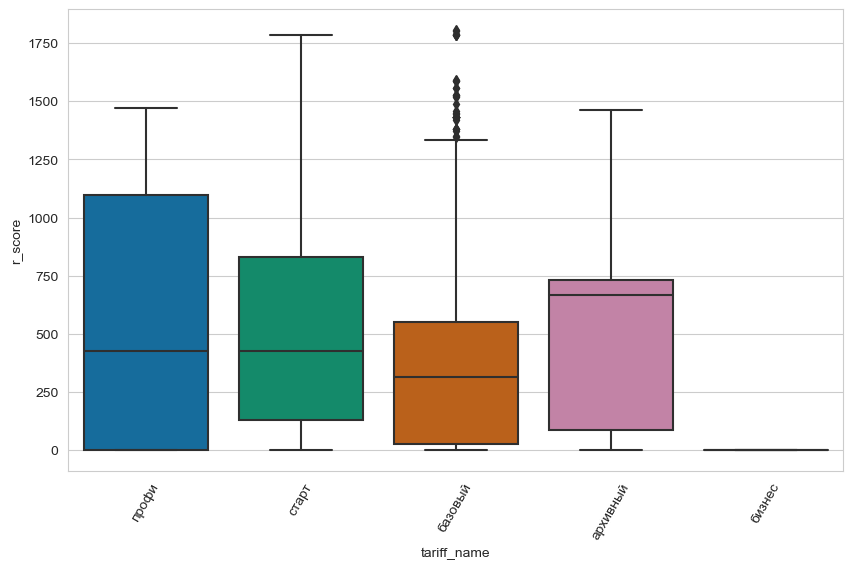

In [142]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=60)
sns.boxplot(data=billing, x='tariff_name', y='r_score')

Чистим выбросы через интеквартильный размах, для разбивки на три категории мы не будем учитывать выбросы, чтобы определить границы интервалов по чистым данным, разбивку на интервалы мы применим ко всем данным

In [57]:
q1, q3 = np.percentile(billing['r_score'], [25, 75])
iqr = q3 - q1
r_top = round(q3 + iqr * 1.5, 2)
r_top

1629.62

In [58]:
r_bins = [0, *np.percentile(billing[billing['r_score'] <= r_top]['r_score'], [33, 66]), billing['r_score'].max()]
r_bins

[0, 165.0, 497.5999999999999, 1805]

In [59]:
r_labels = [3, 2, 1]

Распределим по категориям и получаем ранг R (3 - хорошо, 2 - допустимо, 1 - плохо)

In [60]:
billing['R'] = pd.cut(billing['r_score'], labels=r_labels, bins=r_bins)

Компании с рейтингом 1 - цель для изучения: компании, которые ушли из сервиса, выделяем их в отдельный датасет

In [61]:
leavers = billing[billing['R'] == 1]

Смотрим есть ли среди них компании с активной оплатой

In [62]:
leavers[leavers.churn == 0]

,user_id,company_id,billing_tariff_id,payed_until,is_payed,created_at,updated_at,billing_tariff_price_id,comment,pay_date,tariff_name,prices,last_date,r_score,churn,R


Создаем список из идентификаторов ушедших компаний для создания полного датасета по ним: соединить с остальными датасетами )

In [63]:
print(*leavers.company_id.unique().tolist()[:20])

2474 2035 926 2014 2353 366 483 2565 3633 4032 2507 4038 4041 3917 3515 3443 4132 3323 3429 4145


In [64]:
df_leavers=( leavers
            .merge(companies, on = 'company_id', how ='left')
            .merge(activities, on = 'company_id', how ='left')
            .merge(people, on = 'company_id', how ='left'))

In [65]:
df_leavers = df_leavers[['company_id','billing_tariff_id_x', 'payed_until', 'is_payed','billing_tariff_price_id', 'tariff_name_x', 'prices', 'last_date', 'r_score', 'churn', 'working_direction', 'emp_quantity', 'company_month_resource_orders', 'company_month_contractors','company_month_projects','company_month_stocks'   ]]

Проделаем тоже самое для столбцов для Frequency и Monetory

In [66]:
billing['f_score'] = billing.groupby('user_id')['is_payed'].transform('count')

<Axes: xlabel='tariff_name', ylabel='f_score'>

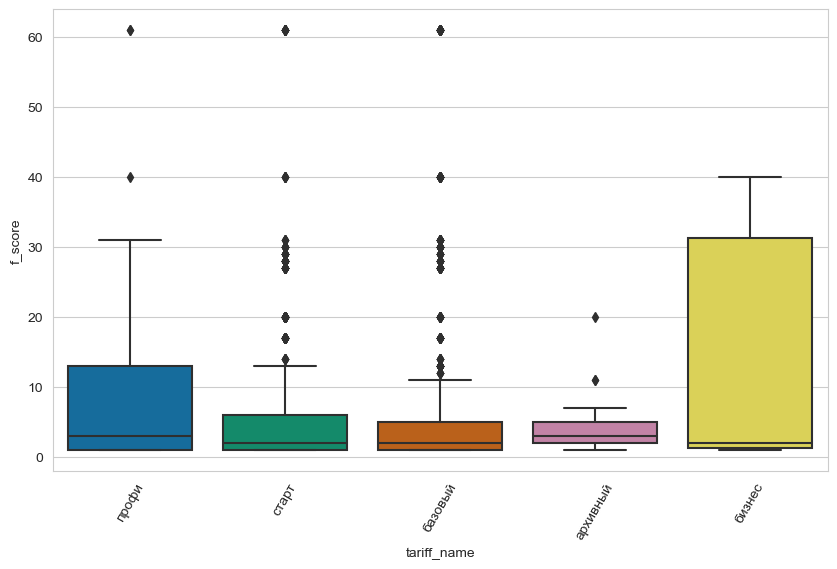

In [143]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=60)
sns.boxplot(data=billing, x='tariff_name', y='f_score')

In [76]:
f_q1, f_q3 = np.percentile(billing['f_score'], [25, 75])
f_iqr = f_q3 - f_q1
f_top = round(f_q3 + f_iqr * 1.5, 2)
f_top

13.5

In [77]:
f_bins = [0, *np.percentile(billing[billing['f_score'] <= f_top]['f_score'], [33, 66]), billing['f_score'].max()]
f_bins

[0, 1.0, 3.0, 61]

In [78]:
f_labels = [3, 2, 1]

In [79]:
billing['F'] = pd.cut(billing['f_score'], labels=f_labels, bins=f_bins)

In [81]:
billing['m_score'] = billing.groupby('user_id')['prices'].transform('sum')

In [82]:
billing['m_score'] = billing['m_score'].fillna(0)

<Axes: xlabel='tariff_name', ylabel='m_score'>

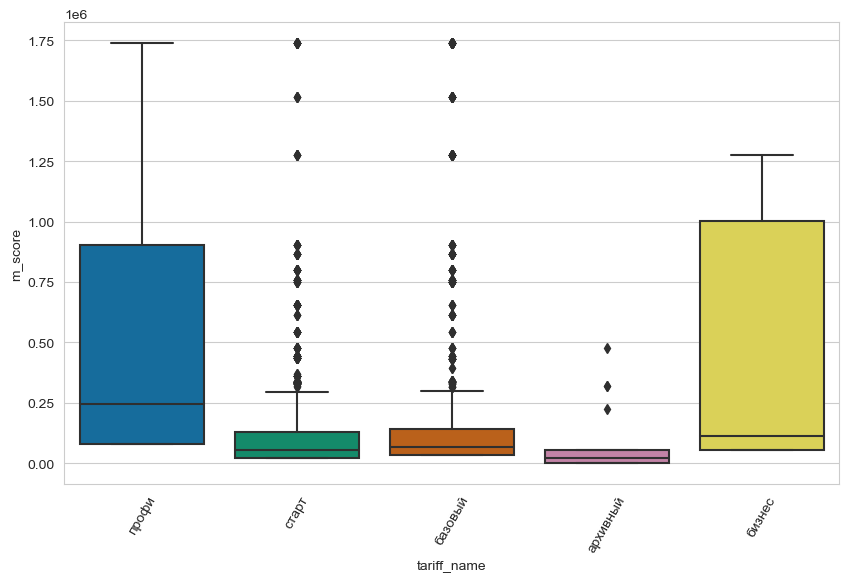

In [144]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=60)
sns.boxplot(data=billing, x='tariff_name', y='m_score')

In [85]:
m_q1, m_q3 = np.percentile(billing['m_score'], [25, 75])
m_iqr = m_q3 - m_q1
m_top = round(m_q3 + m_iqr * 1.5, 2)
m_top

336245.5

In [86]:
m_bins = [0, *np.percentile(billing[billing['m_score'] <= m_top]['m_score'], [33, 66]), billing['m_score'].max()]
m_bins

[0, 33333.0, 75665.0, 1738145.0]

In [87]:
m_labels = [3, 2, 1]
billing['M'] = pd.cut(billing['m_score'], labels=m_labels, bins=m_bins)
billing['M'] = billing['M'].fillna(1)

Сведем полученные результаты в один столбец и разделим по категориям:
- R1—F1—M(1-3) — потерянные
- R1—F(2-3)—M(1-3) — лояльные клиенты, потерявшие активность
- R2-F(1-2)-M(1-3) — спящие
- R2-F(3)-M(1-3) — лояльные спящие клиенты
- R3—F1—M(1-3) — новички
- R3—F2—M(1-3) — развивающиеся
- R3—F3—M3 — постоянные

In [88]:
billing['rfm'] = billing['R'].astype(str)+ '' + billing['F'].astype(str) + '' + billing['M'].astype(str)

Напишем функцию для разделения клиентов по категориям:

In [89]:
def category_rfm(row):
    try:
        if row == '111' or row == '112' or row == '113':
            return 'потерянные'
        if row == '121' or row == '122' or row == '123' or row == '112'or row == '131' or row == '132' or row == '133':
            return 'лояльные клиенты, потерявшие активность'
        if row=='211' or row=='212' or row=='212' or row=='221' or row=='222' or row=='223':
            return ' спящие'
        if row =='231' or row =='232' or row =='233':
            return 'лояльные спящие клиенты'
        if row == '311' or row =='312' or row =='313':
            return 'новички'
        if row=='321' or row =='322' or row =='323':
            return 'развивающиеся'
        if row=='333':
            return 'постоянные'
    except:
        pass

billing['rfm_category'] = billing['rfm'].apply(category_rfm)

In [90]:
billing.sort_values(by='rfm')

,user_id,company_id,billing_tariff_id,payed_until,is_payed,created_at,updated_at,billing_tariff_price_id,comment,pay_date,tariff_name,prices,last_date,r_score,churn,R,f_score,F,m_score,M,rfm,rfm_category
3966,1074,926,3,2020-08-01 00:00:00,True,2020-06-25 12:50:21,2020-06-30 15:16:54,9,NaN,NaT,профи,81500.0,2021-10-01 00:00:00,1097,1,1,20,1,1630000.0,1,111,потерянные
3174,472,430,4,2020-02-22 00:00:00,True,2019-12-02 10:06:51,2020-01-21 07:31:44,13,NaN,NaT,старт,21166.0,2021-10-02 00:00:00,1096,1,1,11,1,329661.0,1,111,потерянные
3175,472,430,4,2021-02-22 23:59:59,False,2020-01-21 07:33:09,2020-01-21 07:33:09,16,NaN,NaT,старт,21166.0,2021-10-02 00:00:00,1096,1,1,11,1,329661.0,1,111,потерянные
3187,531,483,4,2020-02-26 00:00:00,True,2020-01-24 05:15:55,2020-01-24 08:03:29,13,NaN,NaT,старт,21166.0,2022-01-11 23:59:59,994,1,1,17,1,359822.0,1,111,потерянные
3195,124,116,4,2021-01-27 23:59:59,False,2020-01-27 08:41:08,2020-01-27 08:41:08,16,NaN,NaT,старт,21166.0,2022-02-02 00:00:00,973,1,1,4,1,96831.0,1,111,потерянные
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12951,11385,8437,7,2024-08-24 00:00:00,True,2023-08-01 06:20:52,2023-12-21 08:48:50,23,"02,10,23-4дня добавили из-за долгого ответа в ...",2023-08-01 00:00:00,старт,21166.0,2024-08-24 00:00:00,39,1,3,1,3,21166.0,3,333,постоянные
10423,6008,4734,17,2024-09-24 00:00:00,True,2023-03-24 06:50:11,2023-03-24 07:01:56,25,NaN,2023-03-24 07:01:56,базовый,33333.0,2024-09-24 00:00:00,8,1,3,1,3,33333.0,3,333,постоянные
1896,3858,3210,7,2021-11-17 00:00:00,True,2021-05-17 06:09:47,2021-05-17 06:10:21,22,NaN,2021-05-17 06:10:21,старт,21166.0,2024-10-02 00:00:00,0,1,NaN,3,2,63498.0,2,nan22,None
12166,3858,3210,7,2024-10-02 00:00:00,False,2023-10-02 07:47:44,2023-10-02 07:47:48,23,NaN,NaT,старт,21166.0,2024-10-02 00:00:00,0,1,NaN,3,2,63498.0,2,nan22,None


### 2. Предобработка данных

### <font face='Liberation Serif Regular 400 Italic' size=3,5 color='08457e'> Сгруппируем количество счетов компаний по месяцам, проверим динамику, построим график с динамикой

In [99]:
grouped_by_month_billing = (activities
                    .groupby('month', as_index=False)
                    .agg({'company_month_billing':'sum'})
                    .rename(columns={'company_month_billing':'sum'}))

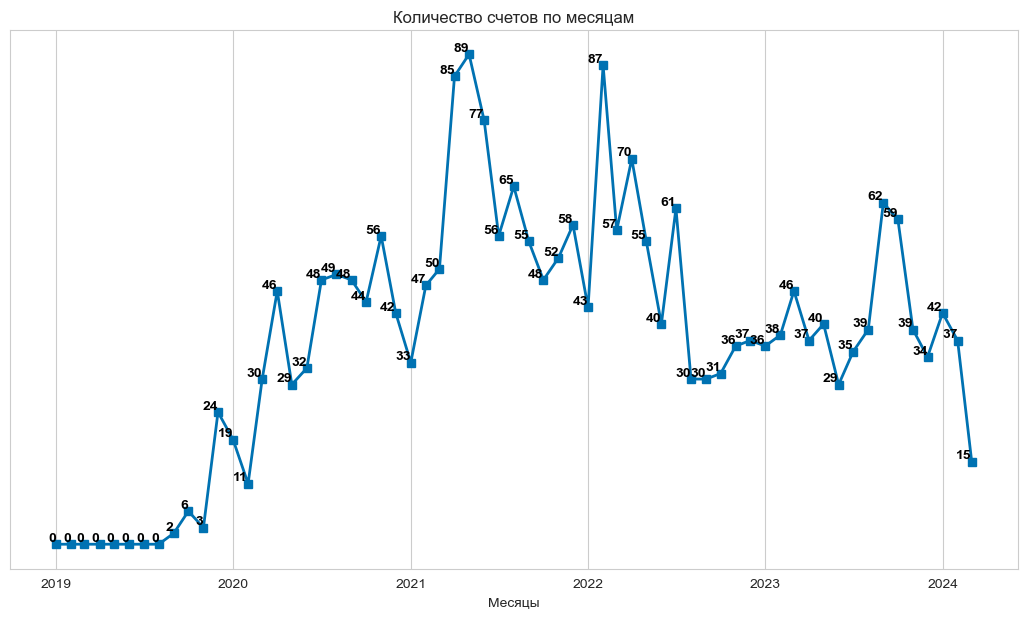

In [102]:
plt.figure(figsize=(13, 7))
plt.plot(grouped_by_month_billing['month'], grouped_by_month_billing['sum'], linewidth=2, marker='s')

for x, y, tex in zip(grouped_by_month_billing['month'], grouped_by_month_billing['sum'], grouped_by_month_billing['sum']):
    t = plt.text(x, y, int(tex),
                 horizontalalignment='right',
                 rotation='horizontal',
                 verticalalignment='bottom',
                 fontdict={'color':'black', 'weight':'bold'})

plt.title('Количество счетов по месяцам')
plt.xlabel('Месяцы')
plt.ylabel('шт')

ax = plt.gca()
ax.get_yaxis().set_visible(False)

plt.show()

Видимо данных за 2019 год нет, компания открылась только в 2018, возможно данные за первые годы (2018-2019) утеряны. Видно, что в 2020 компания только "раскачивалась". были этапы с "провалами" в начале 2020 г(первое полугодие). В 2021 был заметный скачок в первой половине года - более 80 счетов в месяц. Во второй половине 2022 года количество счетов сократилось в два раза и в целом дальше оставалось на этом уровне.

### <font face='Liberation Serif Regular 400 Italic' size=3,5 color='08457e'> Сгруппируем датасет по месячному количеству складов, используемых компаниями.

In [97]:
grouped_by_month_stocks = (activities
                    .groupby('month', as_index=False)
                    .agg({'company_month_stocks':'sum'})
                    .rename(columns={'company_month_stocks':'sum'}))

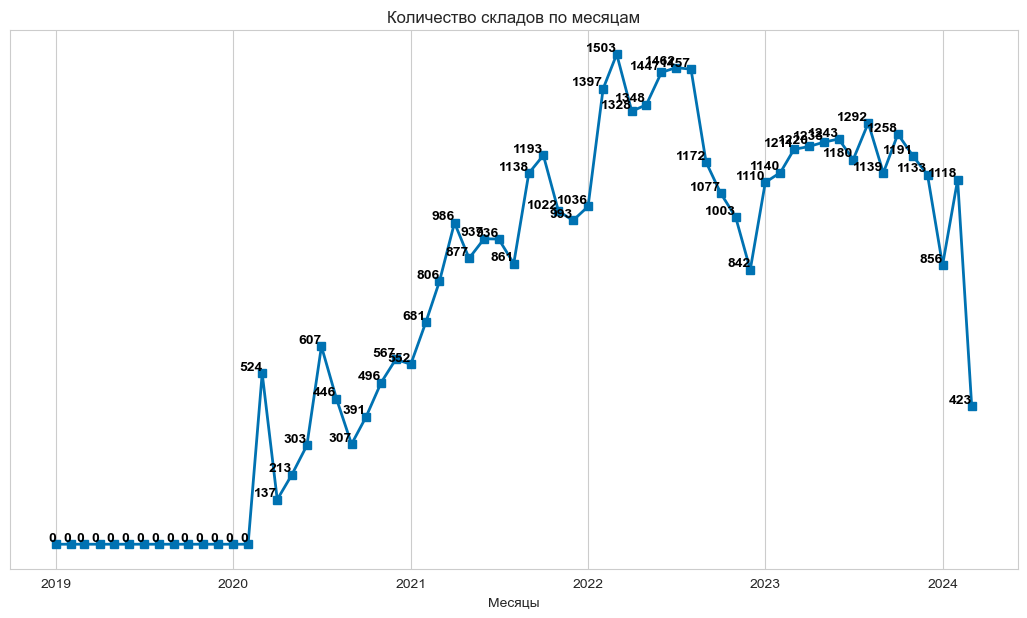

In [101]:
plt.figure(figsize=(13, 7))
plt.plot(grouped_by_month_stocks['month'], grouped_by_month_stocks['sum'], linewidth=2, marker='s')

for x, y, tex in zip(grouped_by_month_stocks['month'], grouped_by_month_stocks['sum'], grouped_by_month_stocks['sum']):
    t = plt.text(x, y, int(tex),
                 horizontalalignment='right',
                 rotation='horizontal',
                 verticalalignment='bottom',
                 fontdict={'color':'black', 'weight':'bold'})

plt.title('Количество складов по месяцам')
plt.xlabel('Месяцы')
plt.ylabel('шт')

ax = plt.gca()
ax.get_yaxis().set_visible(False)

plt.show()

В целом видим, что количество используемых складов растет. Было значительное падение в конце 2023 года почти в два раза, но в 2024 количество используемых складов стало равномерным - 1100-1200

### <font face='Liberation Serif Regular 400 Italic' size=3,5 color='08457e'> Сгруппируем данные по количеству бэкапов компаний

In [103]:
grouped_by_month_backups = (activities
                    .groupby('month', as_index=False)
                    .agg({'company_month_backups':'sum'})
                    .rename(columns={'company_month_backups':'sum'}))

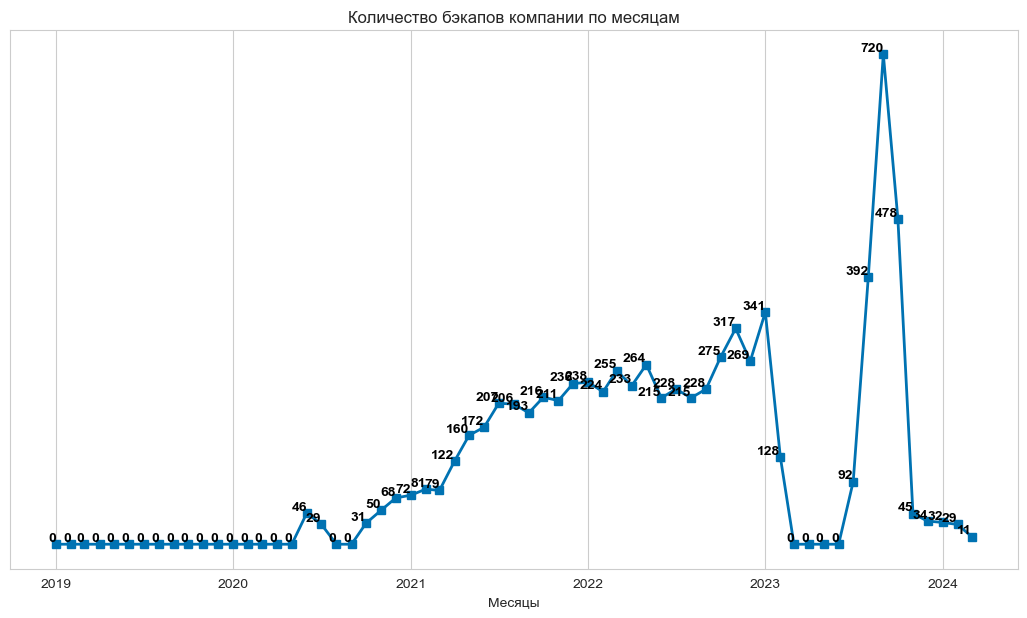

In [105]:
plt.figure(figsize=(13, 7))
plt.plot(grouped_by_month_backups['month'], grouped_by_month_backups['sum'], linewidth=2, marker='s')

for x, y, tex in zip(grouped_by_month_backups['month'], grouped_by_month_backups['sum'], grouped_by_month_backups['sum']):
    t = plt.text(x, y, int(tex),
                 horizontalalignment='right',
                 rotation='horizontal',
                 verticalalignment='bottom',
                 fontdict={'color':'black', 'weight':'bold'})

plt.title('Количество бэкапов компании по месяцам')
plt.xlabel('Месяцы')
plt.ylabel('шт')

ax = plt.gca()
ax.get_yaxis().set_visible(False)

plt.show()

Бэкапы компании в 2023 году (первая половина года) данные отсутствуют за несколько месяцев, возможно данные были утеряны либо был технический сбой, так как во второй половине года можем наблдать резкий скачок (в два раза). В период с середины 2021 и до 2023 года количество бэкапов распределено равномерно - 200-300

### <font face='Liberation Serif Regular 400 Italic' size=3,5 color='08457e'> Сгруппируем данные по количеству проектов компаний, построем график по месячно

In [106]:
grouped_by_month_projects = (activities
                    .groupby('month', as_index=False)
                    .agg({'company_month_projects':'sum'})
                    .rename(columns={'company_month_projects':'sum'}))

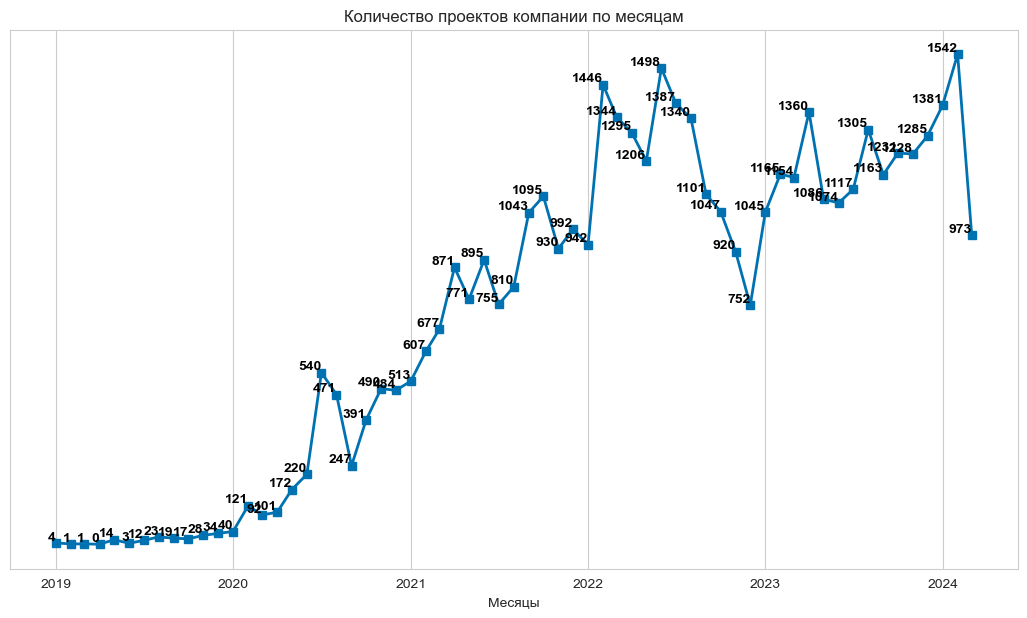

In [107]:
plt.figure(figsize=(13, 7))
plt.plot(grouped_by_month_projects['month'], grouped_by_month_projects['sum'], linewidth=2, marker='s')

for x, y, tex in zip(grouped_by_month_projects['month'], grouped_by_month_projects['sum'], grouped_by_month_projects['sum']):
    t = plt.text(x, y, int(tex),
                 horizontalalignment='right',
                 rotation='horizontal',
                 verticalalignment='bottom',
                 fontdict={'color':'black', 'weight':'bold'})

plt.title('Количество проектов компании по месяцам')
plt.xlabel('Месяцы')
plt.ylabel('шт')

ax = plt.gca()
ax.get_yaxis().set_visible(False)

plt.show()

с 2020 по 2022 наблюдаем постепенный рост количества проектов, в конце 2022 года наблюдаем падение количества проектов в два раза, в 2023 по 2024 количество проектов держится на одном уровне 1000-1300

### <font face='Liberation Serif Regular 400 Italic' size=3,5 color='08457e'> Сгруппируем данные по количеству контрагентов компаний, построим график по месяцам

In [109]:
grouped_by_month_contractors = (activities
                    .groupby('month', as_index=False)
                    .agg({'company_month_contractors':'sum'})
                    .rename(columns={'company_month_contractors':'sum'}))

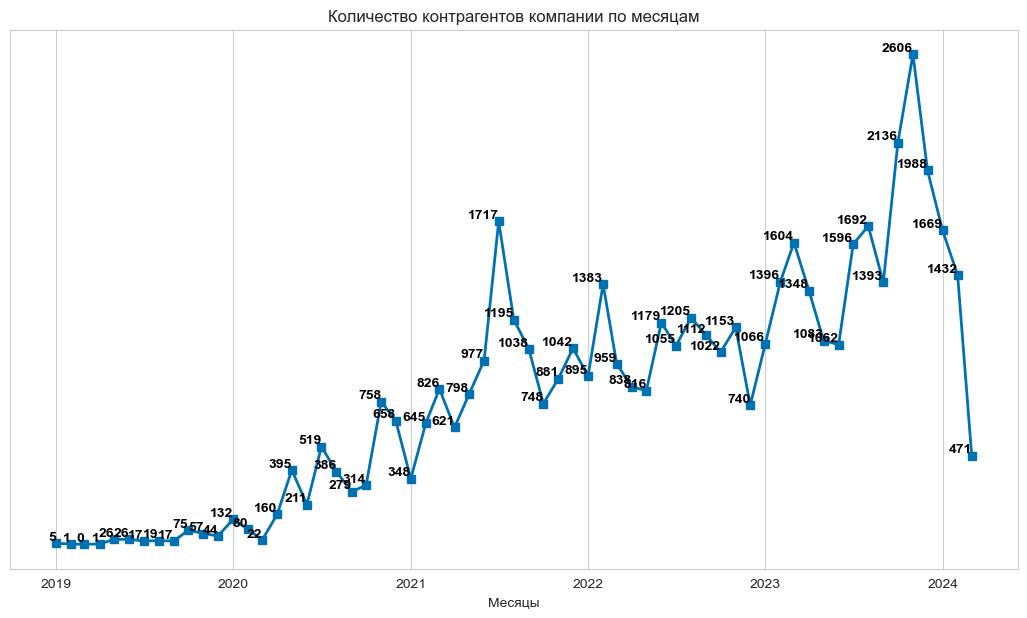

In [110]:
plt.figure(figsize=(13, 7))
plt.plot(grouped_by_month_contractors['month'], grouped_by_month_contractors['sum'], linewidth=2, marker='s')

for x, y, tex in zip(grouped_by_month_contractors['month'], grouped_by_month_contractors['sum'], grouped_by_month_contractors['sum']):
    t = plt.text(x, y, int(tex),
                 horizontalalignment='right',
                 rotation='horizontal',
                 verticalalignment='bottom',
                 fontdict={'color':'black', 'weight':'bold'})

plt.title('Количество контрагентов компании по месяцам')
plt.xlabel('Месяцы')
plt.ylabel('шт')

ax = plt.gca()
ax.get_yaxis().set_visible(False)

plt.show()

с 2019 по 2021 наблюдаем рост количество контрагентов компаний, в середине 2021 можем видеть пик количества контрагентов - 1717. С середины 2021 по середину 2023 года количество контрагентов равноерное - 1000-1600. В конце 2023 наблюдаем скачок - 2606.

### <font face='Liberation Serif Regular 400 Italic' size=3,5 color='08457e'> Рассмотрим количество закаов материалов компаний и построим диаграмму по месяцам

In [111]:
grouped_by_month_orders = (activities
                    .groupby('month', as_index=False)
                    .agg({'company_month_resource_orders':'sum'})
                    .rename(columns={'company_month_resource_orders':'sum'}))

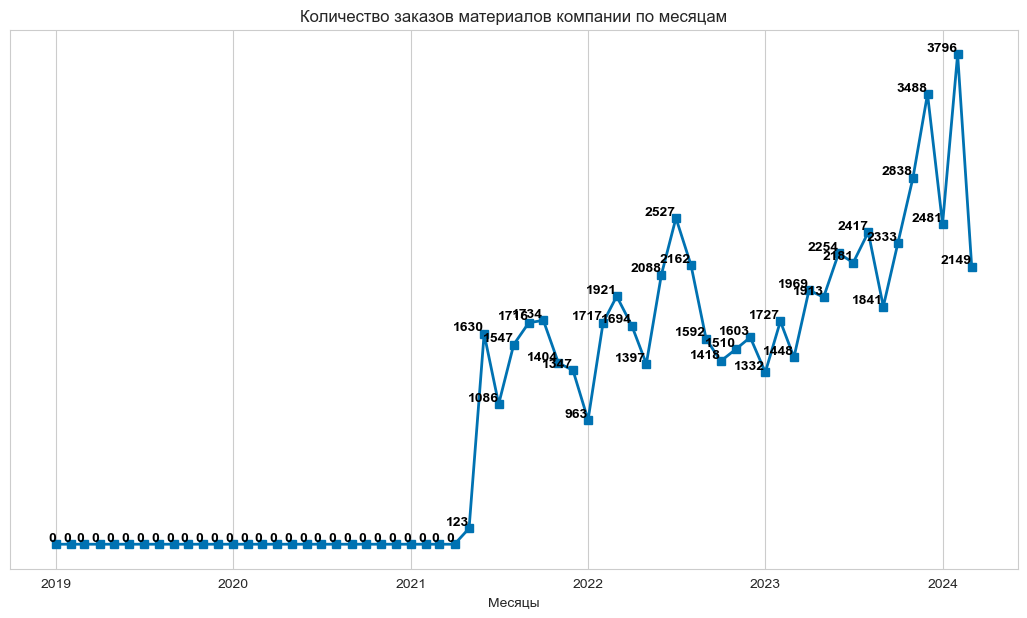

In [112]:
plt.figure(figsize=(13, 7))
plt.plot(grouped_by_month_orders['month'], grouped_by_month_orders['sum'], linewidth=2, marker='s')

for x, y, tex in zip(grouped_by_month_orders['month'],grouped_by_month_orders['sum'], grouped_by_month_orders['sum']):
    t = plt.text(x, y, int(tex),
                 horizontalalignment='right',
                 rotation='horizontal',
                 verticalalignment='bottom',
                 fontdict={'color':'black', 'weight':'bold'})

plt.title('Количество заказов материалов компании по месяцам')
plt.xlabel('Месяцы')
plt.ylabel('шт')

ax = plt.gca()
ax.get_yaxis().set_visible(False)

plt.show()

По всей видимости данные за 2019 - начало 2021 утеряны либо не собирались. с середины 2021 по 2024 год количество заказов равномерное 1500-1800. в конце 2023 и начале 2024 заметен рост - пиковые значения 3488, 3796

### <font face='Liberation Serif Regular 400 Italic' size=3,5 color='08457e'> Посмотрим распределение компаний по направлениям, построим столбчатую диаграмму

In [113]:
grouped_by_directions = (companies.
                         groupby('working_direction', as_index=False)
                         .agg({'company_id':'nunique'})
                         .rename(columns={'company_id':'quantity'})
                         .sort_values(by='quantity', ascending=False))

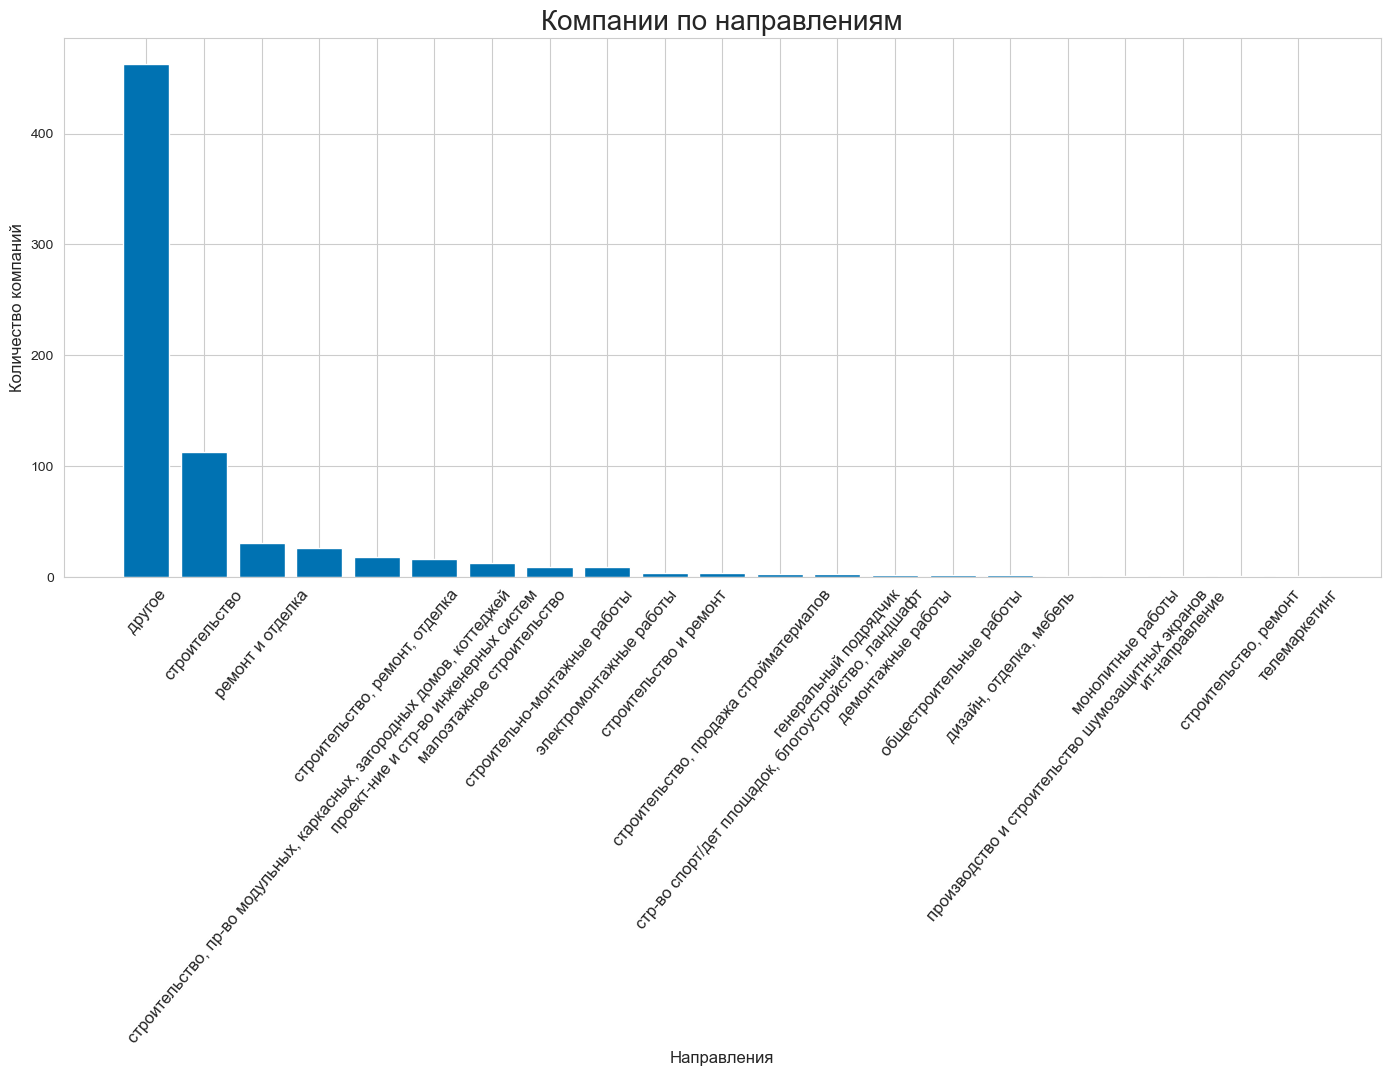

In [116]:
plt.figure(figsize=(17, 7))
plt.bar(grouped_by_directions['working_direction'], grouped_by_directions['quantity'])
plt.title('Компании по направлениям', fontsize=20)
plt.xlabel('Направления', fontsize=12)
plt.ylabel('Количество компаний', fontsize=12)
plt.xticks(rotation=50, fontsize=12)
plt.show()

Более 400 компаний не указали свой вид деятельности. Следующая категория "строительство" - в данную группу добавлены компании, занимающиеся разными видами строительства (детального описания не было), следующая большая группа это компании, занимающиеся ремонтов и отделкой/ремонтом, отделкой и строительством/строительством загородной недвижимости и пр.

### <font face='Liberation Serif Regular 400 Italic' size=3,5 color='08457e'> Проверим распределение компаний по тарифам

In [117]:
grouped_by_tariff = (companies.query('billing_tariff_id not in [1, 18, 22 ]')
                     .groupby('tariff_name', as_index=False)
                     .agg({'company_id':'count'})
                     .rename(columns={'company_id':'quantity'})
                     .sort_values(by='quantity', ascending=False))

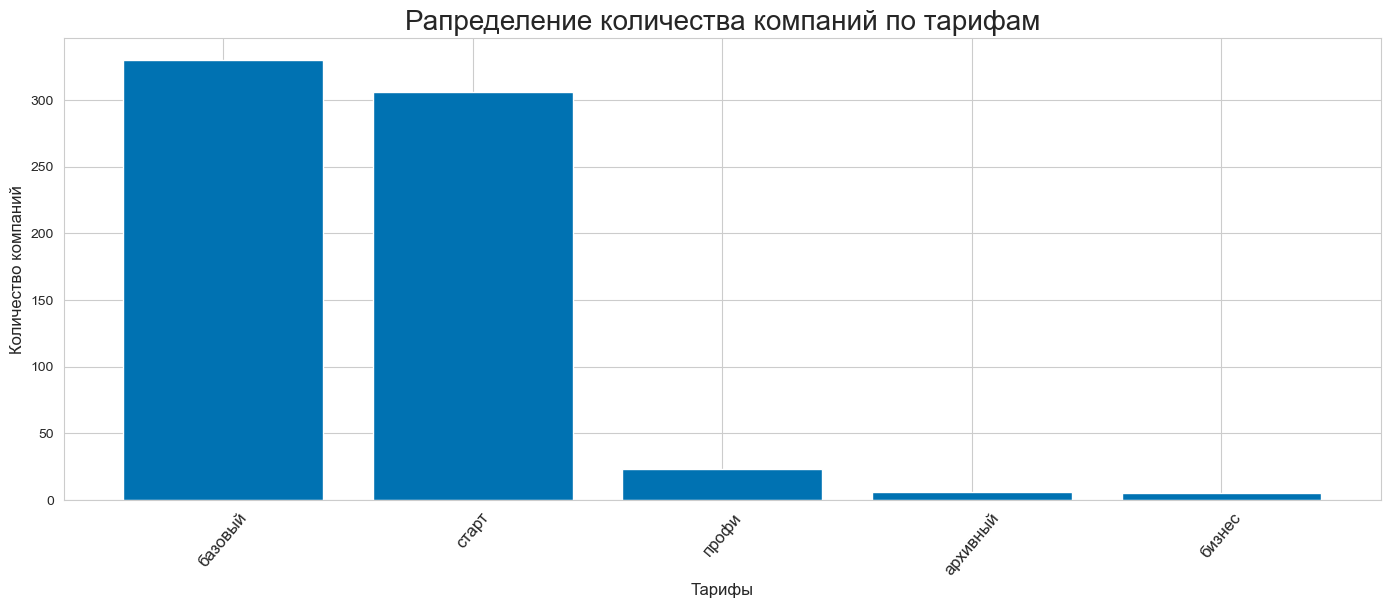

In [118]:
plt.figure(figsize=(17, 6))
plt.bar(grouped_by_tariff['tariff_name'], grouped_by_tariff['quantity'])
plt.title('Рапределение количества компаний по тарифам', fontsize=20)
plt.xlabel('Тарифы', fontsize=12)
plt.ylabel('Количество компаний',fontsize=12)
plt.xticks(rotation=50, fontsize=12)
plt.show()

Две самые большие группы - базовый(330) и стартовый тариф(306) - самые наименьшие по стоимости. Наименьшая группа - бизнес (5)

### <font face='Liberation Serif Regular 400 Italic' size=3,5 color='08457e'> Рассмотрим количество сотрудников по компаниям

In [119]:
grouped_by_employers = (companies.groupby('emp_quantity', as_index=False)
                        .agg({'company_id':'count'})
                        .rename(columns={'company_id':'quantity'})
                        .sort_values(by='quantity', ascending=False))

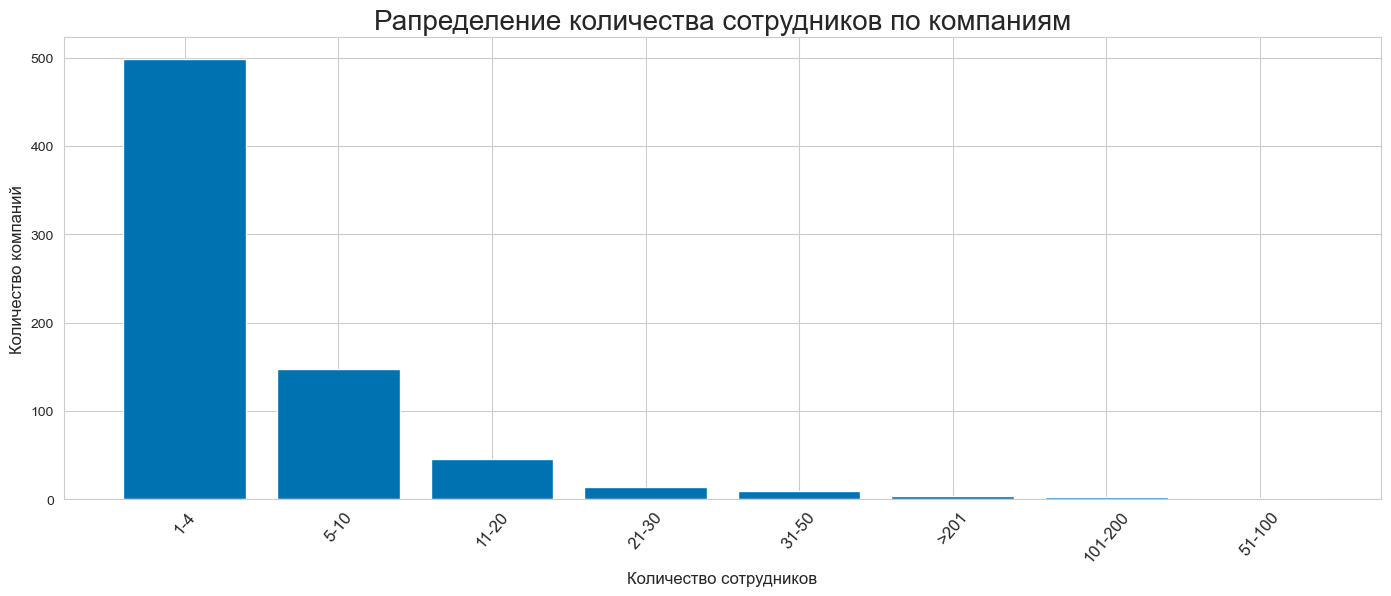

In [120]:
plt.figure(figsize=(17, 6))
plt.bar(grouped_by_employers['emp_quantity'], grouped_by_employers['quantity'])
plt.title('Рапределение количества сотрудников по компаниям', fontsize=20)
plt.xlabel('Количество сотрудников', fontsize=12)
plt.ylabel('Количество компаний', fontsize=12)
plt.xticks(rotation=50, fontsize=12)
plt.show()

В основном клиентами Гектаро являеются компании с количеством сотрудников 1-4, таких компаний около 500, 147 компаний имеют количество сотрудников 5-10, третья по величине группа 11-20 сотрудниками. Можно сделать вывод, что большие компании (с количеством сотрудников более 50 не пользуется услугами компании

### <font face='Liberation Serif Regular 400 Italic' size=3,5 color='08457e'> Проверим количество компаний, которые отключились /удалили профель в течение пробного бесплатного периода

In [121]:
grouped_by_trial = (people.groupby('trial', as_index=False)
                        .agg({'company_id':'count'})
                        .rename(columns={'company_id':'quantity'})
                        .sort_values(by='quantity', ascending=False))

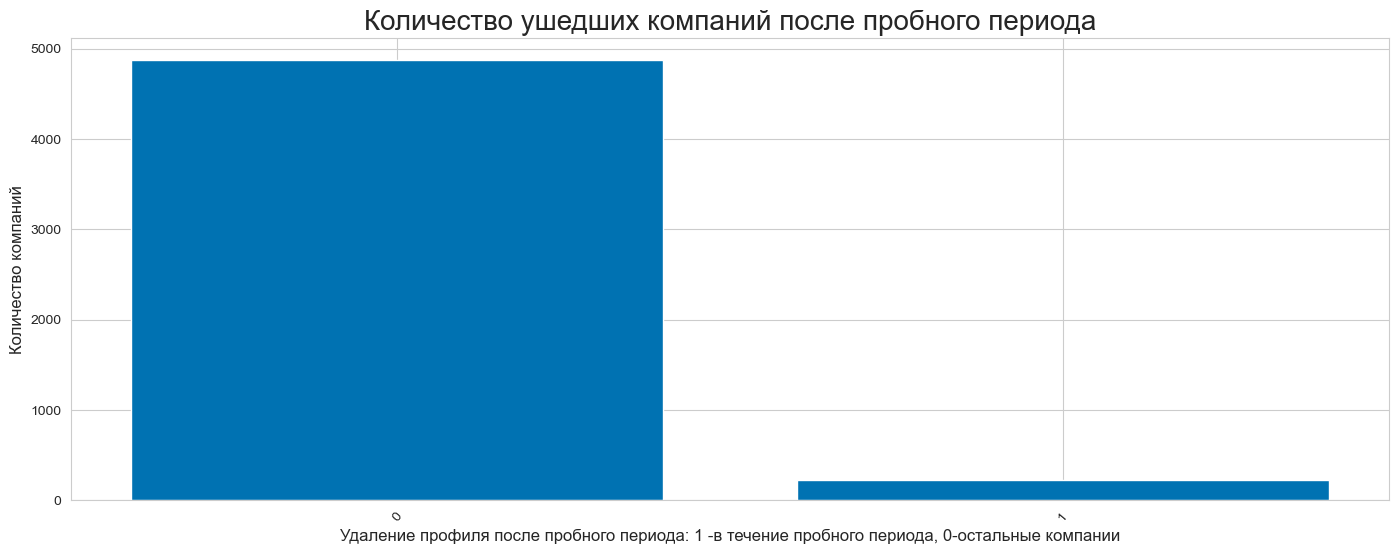

In [122]:
plt.figure(figsize=(17, 6))
plt.bar(grouped_by_trial['trial'], grouped_by_trial['quantity'])
plt.title('Количество ушедших компаний после пробного периода', fontsize=20)
plt.xlabel('Удаление профиля после пробного периода: 1 -в течение пробного периода, 0-остальные компании', fontsize=12)
plt.ylabel('Количество компаний', fontsize=12)
plt.xticks(rotation=50)
plt.show()

Таких компаний 221, далее проверим зависимость данного показателя от других

### <font face='Liberation Serif Regular 400 Italic' size=3,5 color='08457e'> RFM-анализ

Проведем RFM-анализ.
Это анализ клиентской базы на основе истории покупок. RFM-анализ происходит по трём показателям:

- Recency — давность покупки — промежуток времени с момента последней покупки. Клиенты, которые покупали недавно, с большей вероятностью купят снова.
- Frequency — частота покупок — количество покупок за данный период. Вероятность продажи по клиентам будет больше, если человек совершал много покупок.
- Monetary — сумма покупок — сумма всех покупок за данный период. Клиенты, потратившие на покупки большую сумму денег, вероятнее всего потратят снова.

Сгруппируем клиентов по категориям:

- R1—F1—M(1-3) — потерянные
- R1—F(2-3)—M(1-3) — лояльные клиенты, потерявшие активность
- R2-F(1-2)-M(1-3) — спящие
- R2-F(3)-M(1-3) — лояльные спящие клиенты
- R3—F1—M(1-3) — новички
- R3—F2—M(1-3) — развивающиеся
- R3—F3—M3 — постоянные

In [123]:
grouped_by_rfm = (billing.groupby('rfm', as_index=False)
                  .agg({'company_id':'count'})
                  .rename(columns={'company_id':'quantity'})
                  .sort_values(by='rfm'))
grouped_by_rfm

,rfm,quantity
0,111,299
1,113,5
2,121,51
3,122,267
4,123,3
5,131,57
6,133,514
7,211,330
8,212,11
9,221,82


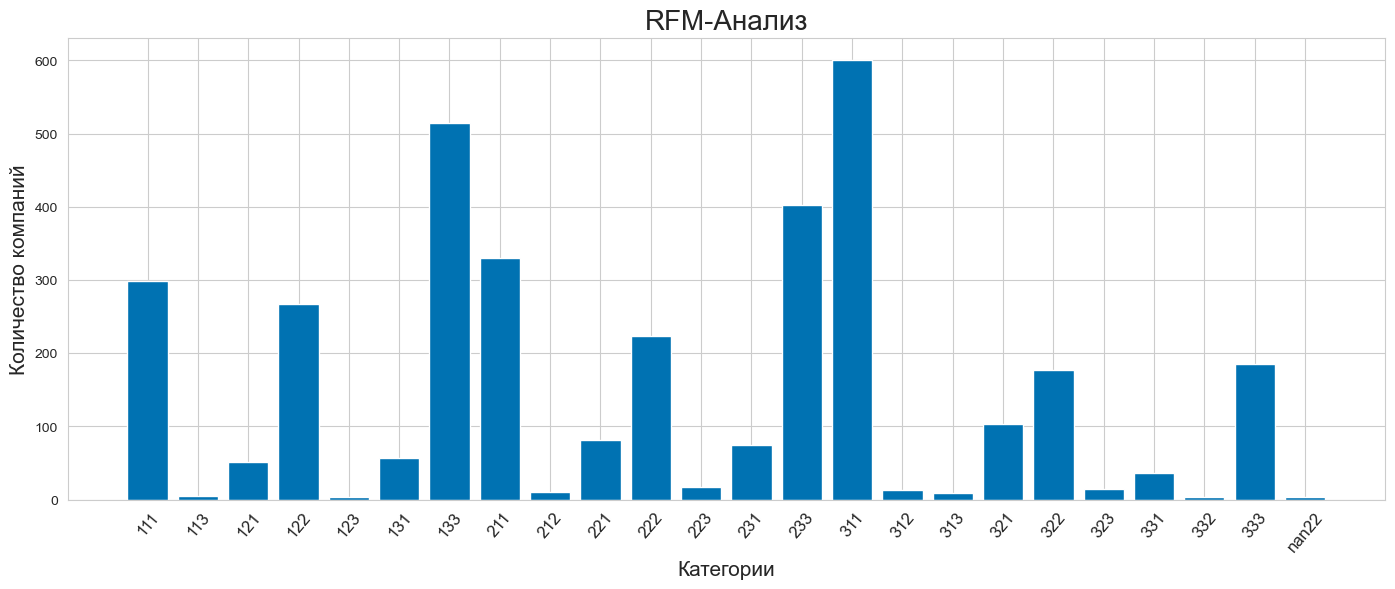

In [124]:
plt.figure(figsize=(17, 6))
plt.bar(grouped_by_rfm['rfm'], grouped_by_rfm['quantity'])
plt.title('RFM-Анализ', fontsize=20)
plt.xlabel('Категории', fontsize=15)
plt.ylabel('Количество компаний', fontsize=15)
plt.xticks(rotation=50, fontsize=12)
plt.show()

Больше всего клиентов в категории «лояльные спящие клиенты» – более 400

### <font face='Liberation Serif Regular 400 Italic' size=3,5 color='08457e'> Портрет ушедшего пользователя

In [125]:
df_leavers.head()

,company_id,billing_tariff_id_x,payed_until,is_payed,billing_tariff_price_id,tariff_name_x,prices,last_date,r_score,churn,working_direction,emp_quantity,company_month_resource_orders,company_month_contractors,company_month_projects,company_month_stocks
0,2474,7,2021-12-22 00:00:00,True,23,старт,21166.0,2022-08-28,766,1,NaN,NaN,NaN,NaN,NaN,NaN
1,2035,7,2022-01-29 23:59:59,False,23,старт,21166.0,2022-11-03,699,1,другое,1-4,0.0,26.0,4.0,1.0
2,2035,7,2022-01-29 23:59:59,False,23,старт,21166.0,2022-11-03,699,1,другое,1-4,0.0,26.0,4.0,1.0
3,2035,7,2022-01-29 23:59:59,False,23,старт,21166.0,2022-11-03,699,1,другое,1-4,0.0,26.0,4.0,1.0
4,2035,7,2022-01-29 23:59:59,False,23,старт,21166.0,2022-11-03,699,1,другое,1-4,0.0,26.0,4.0,1.0


Рассмотрим распределение по направлениям деятельности

In [126]:
df_leavers_wd = (df_leavers.groupby('working_direction', as_index=False)
              .agg({'company_id':'nunique'})
              .rename(columns={'company_id':'quantity'})
              .sort_values(by = 'quantity', ascending=False))
df_leavers_wd

,working_direction,quantity
3,другое,211
10,строительство,41
7,ремонт и отделка,13
12,"строительство, пр-во модульных, каркасных, заг...",10
5,малоэтажное строительство,6
6,проект-ние и стр-во инженерных систем,6
16,электромонтажные работы,5
14,"строительство, ремонт, отделка",5
9,строительно-монтажные работы,4
11,строительство и ремонт,3


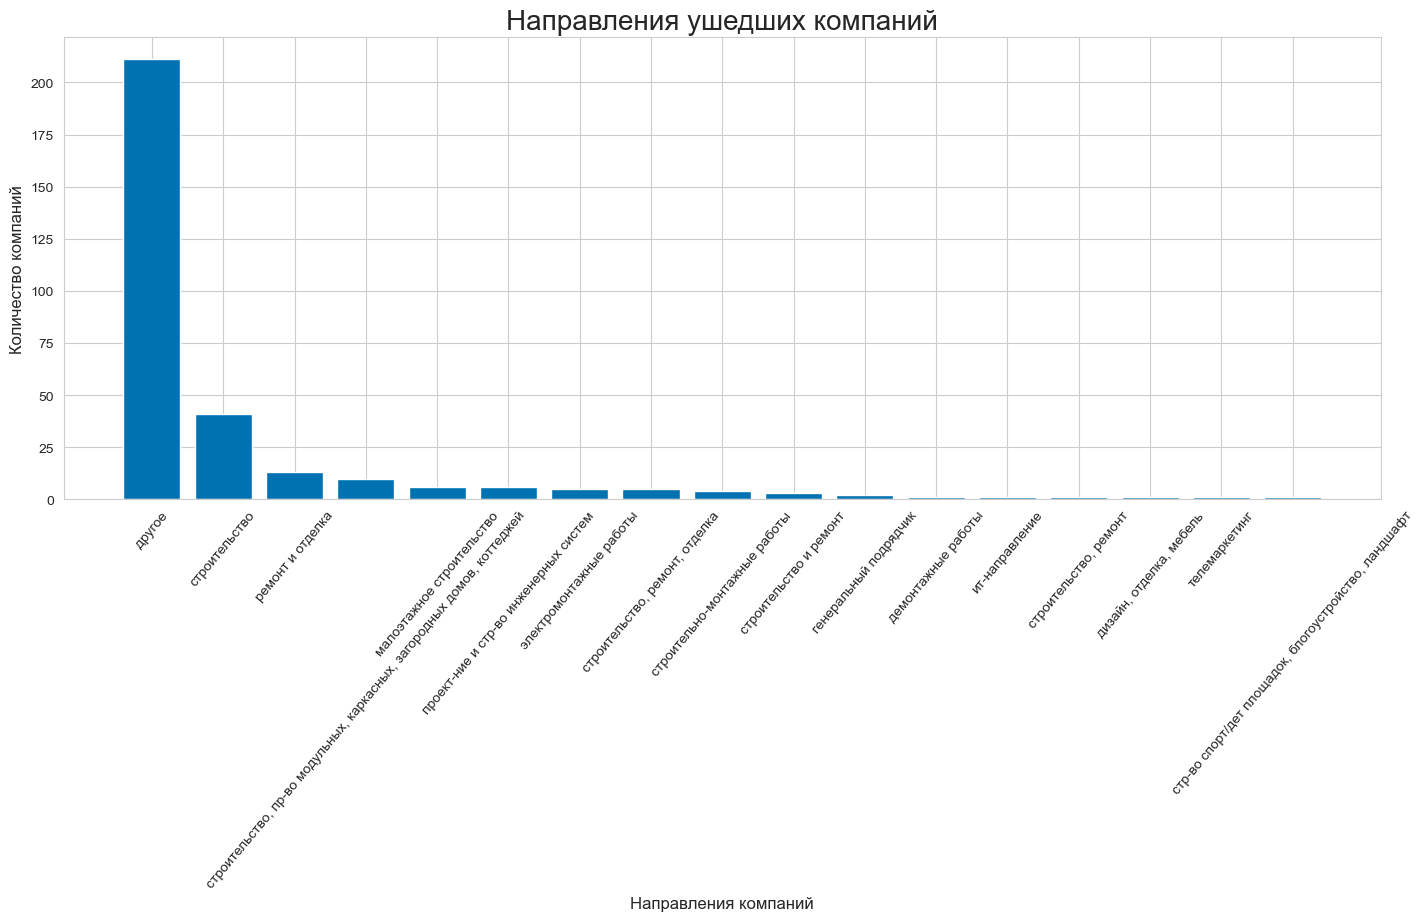

In [127]:
plt.figure(figsize=(17, 6))
plt.bar(df_leavers_wd['working_direction'], df_leavers_wd['quantity'])
plt.title('Направления ушедших компаний', fontsize=20)
plt.xlabel('Направления компаний', fontsize=12)
plt.ylabel('Количество компаний', fontsize=12)
plt.xticks(rotation=50)
plt.show()

Большинство ушедших ушедших компаний не указывает направление своей деятельности - 213

In [128]:
tariff_leavers = (df_leavers.groupby('tariff_name_x', as_index=False)
                  .agg({'company_id':'nunique'})
                  .rename(columns={'company_id':'quantity'})
                  .sort_values(by = 'quantity', ascending=False))
tariff_leavers

,tariff_name_x,quantity
3,старт,375
1,базовый,372
2,профи,38
0,архивный,6


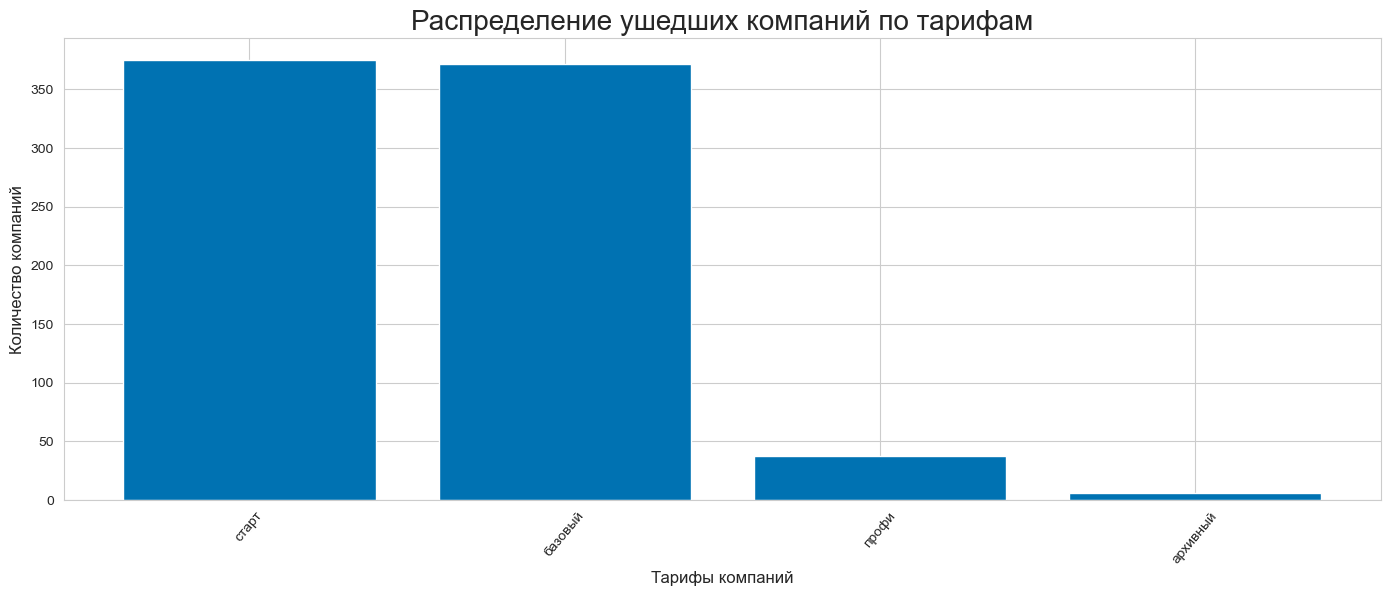

In [129]:
plt.figure(figsize=(17, 6))
plt.bar(tariff_leavers['tariff_name_x'], tariff_leavers['quantity'])
plt.title('Распределение ушедших компаний по тарифам', fontsize=20)
plt.xlabel('Тарифы компаний', fontsize=12)
plt.ylabel('Количество компаний', fontsize=12)
plt.xticks(rotation=50)
plt.show()

Компании в основном пользуются тарифом базовый и старт - более 350 пользователей в каждой из категорий

In [130]:
emp_quantity_leavers = (df_leavers
                        .groupby('emp_quantity', as_index=False)
                        .agg({'company_id':'nunique'})
                        .rename(columns={'company_id':'quantity'})
                        .sort_values(by = 'quantity', ascending=False))
emp_quantity_leavers

,emp_quantity,quantity
0,1-4,239
4,5-10,50
1,11-20,13
2,21-30,6
3,31-50,3
5,>201,1


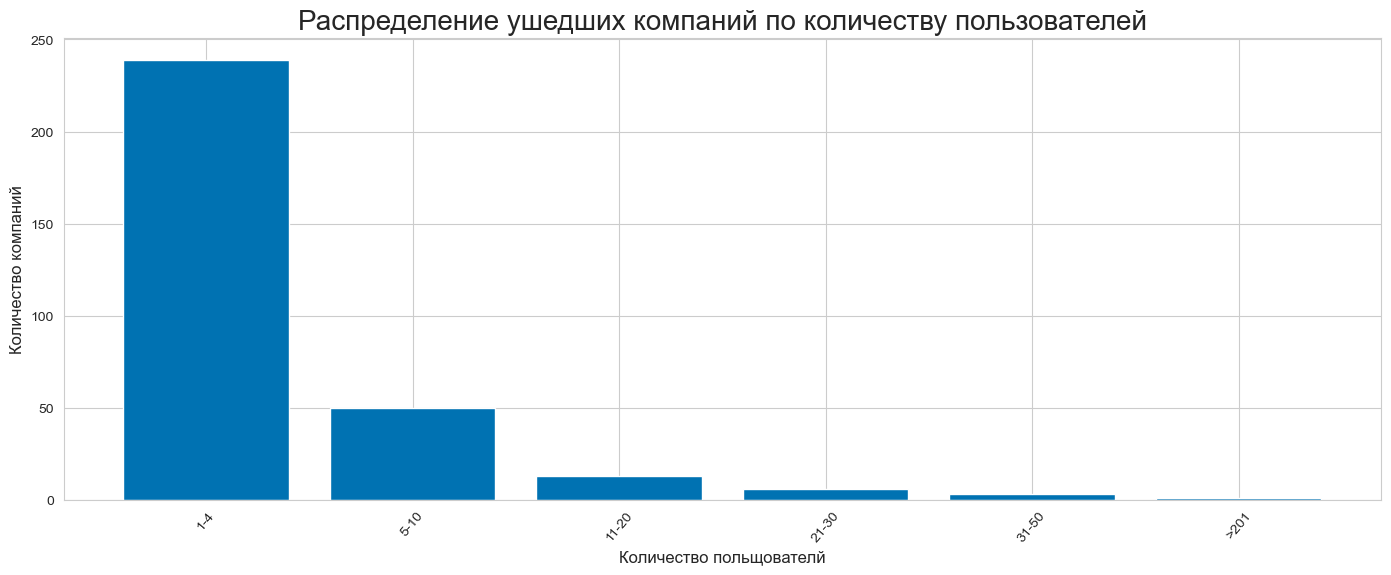

In [131]:
plt.figure(figsize=(17, 6))
plt.bar(emp_quantity_leavers['emp_quantity'],emp_quantity_leavers['quantity'])
plt.title('Распределение ушедших компаний по количеству пользователей', fontsize=20)
plt.xlabel('Количество польщователй', fontsize=12)
plt.ylabel('Количество компаний', fontsize=12)
plt.xticks(rotation=50)
plt.show()

Штатное количество сотрулников от 1-4, таких компаний 240. Возможно, что такие клиенты мало внимания уделяют указанию доп информации о компании

### <font face='Liberation Serif Regular 400 Italic' size=3,5 color='08457e'> Гипотеза

Сформулируем гипотезу:
Средний чек в месяц зависит от курса доллара

In [132]:
billing.head()

,user_id,company_id,billing_tariff_id,payed_until,is_payed,created_at,updated_at,billing_tariff_price_id,comment,pay_date,tariff_name,prices,last_date,r_score,churn,R,f_score,F,m_score,M,rfm,rfm_category
4,567,512,3,2021-12-22 06:08:22,False,2020-12-22 06:08:22,2020-12-22 06:08:22,12,NaN,NaT,профи,81500.0,2033-04-10 23:59:59,1,1,3,7,1,223831.0,1,311,новички
6,2861,2474,7,2021-12-22 00:00:00,True,2020-12-22 08:36:02,2020-12-22 08:36:21,23,NaN,2020-12-22 08:36:21,старт,21166.0,2022-08-28 00:00:00,766,1,1,2,2,54499.0,2,122,"лояльные клиенты, потерявшие активность"
16,1902,1645,2,2021-03-24 09:18:04,False,2020-12-24 09:18:04,2020-12-24 09:18:04,6,NaN,NaT,базовый,33333.0,2023-12-26 00:00:00,281,1,2,6,1,199998.0,1,211,спящие
18,2352,2035,7,2022-01-29 23:59:59,False,2020-12-25 07:59:35,2020-12-25 07:59:35,23,NaN,NaT,старт,21166.0,2022-11-03 00:00:00,699,1,1,7,1,184663.0,1,111,потерянные
24,1074,926,3,2021-01-30 00:00:00,True,2020-12-24 12:47:52,2020-12-25 12:34:34,9,NaN,2020-12-29 00:00:00,профи,81500.0,2021-10-01 00:00:00,1097,1,1,20,1,1630000.0,1,111,потерянные


In [133]:
billing_short = billing.groupby('created_at', as_index=False).agg({'prices':'mean'})
billing_short

,created_at,prices
0,2019-07-23 09:32:39,33333.0
1,2019-07-23 11:43:26,33333.0
2,2019-07-23 11:45:57,33333.0
3,2019-07-23 15:48:05,81500.0
4,2019-07-24 08:59:26,33333.0
...,...,...
3474,2024-03-11 11:34:09,81500.0
3475,2024-03-12 15:53:34,33333.0
3476,2024-03-12 17:15:17,33333.0
3477,2024-03-12 17:52:29,21166.0


In [134]:
billing_short['month'] = pd.to_datetime(billing_short['created_at'], unit='s').dt.to_period('M')

In [135]:
billing_short = billing_short[['month','prices' ]]

In [136]:
currency['month'] = pd.to_datetime(currency['month'], unit='s').dt.to_period('M')

In [137]:
united = billing_short.merge(currency, on ='month', how='left')
united.drop_duplicates(keep='first')
united

,month,prices,currency
0,2019-07,33333.0,63.1991
1,2019-07,33333.0,63.1991
2,2019-07,33333.0,63.1991
3,2019-07,81500.0,63.1991
4,2019-07,33333.0,63.1991
...,...,...,...
3474,2024-03,81500.0,NaN
3475,2024-03,33333.0,NaN
3476,2024-03,33333.0,NaN
3477,2024-03,21166.0,NaN


In [138]:
print(united['currency'].corr(united['prices']))
print(united['prices'].corr(united['currency']))

-0.011201640880648065
-0.011201640880648065


array([[<Axes: xlabel='prices', ylabel='prices'>,
        <Axes: xlabel='currency', ylabel='prices'>],
       [<Axes: xlabel='prices', ylabel='currency'>,
        <Axes: xlabel='currency', ylabel='currency'>]], dtype=object)

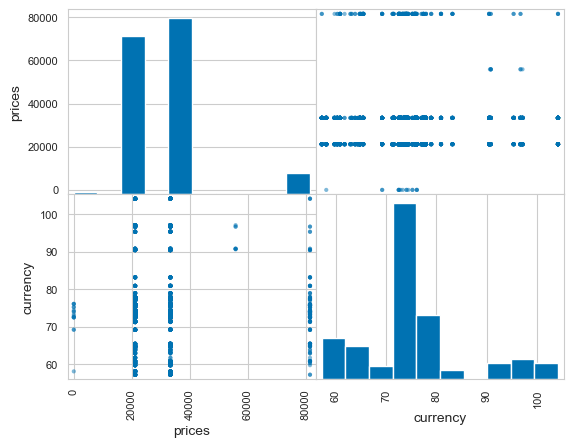

In [139]:
pd.plotting.scatter_matrix(united)

Значение корреляции в обоих случаях -0.01. Значит зависимость среднемесячного курса доллара от средней месячной оплаты клиента отсутствует.

### ВЫВОД:
Была проведено исследование датасетов activities(строк 6316, колонок 9), billing(строк 3480, колонок 13), companies(строк 723, колонок 8), people(строк 5095, колонок 9). Имеются пропуски в датасетах billing, companies, people. Дубликатов обнаружено не было.

#### Преобработка:
Были переименованы столбцы в некоторых датасетах, удалены столбцы, формат дат приведен в соответствие, сменены типы данных. Проверены уникальные значения, преобразованы неявные дубликаты. Написаны функции для добавления столбцов с категориями наименований тарифов, цен, количество сотрудников организаций. Посчитана разница в днях по всем профилям по датасету people, проставлены "флаги" по тем, кто удалился в пробный период(бесплатный). Проверили выбросы, добавили метки для RFM анализа.

#### Анализ:

Данные за более ранние периоды отсутствуют. Видимо данных за 2019 год нет, компания открылась только в 2018, возможно данные за первые годы (2018-2019) утеряны. Видно, что в 2020 компания только "раскачивалась". Юыли этапы с "провалами" в начале 2020 г(первое полугодие). В 2021 был заметный скачок в первой половине года - более 80 счетов в месяц. Во второй половине 2022 года количество счетов сократилось в два раза и в целом дальше оставалось на этом уровне.

В целом видим, что количество используемых складов растет. Было значительное падение в конце 2023 года почти в два раза, но в 2024 количество используемых складов стало равномерным - 1100-1200

Бэкапы компании в 2023 году (первая половина года) данные отсутствуют за несколько месяцев, возможно данные были утеряны либо был технический сбой, так как во второй половине года можем наблдать резкий скачок (в два раза). В период с середины 2021 и до 2023 года количество бэкапов распределено равномерно - 200-300

с 2020 по 2022 наблюдаем постепенный рост количества проектов, в конце 2022 года наблюдаем падение количества проектов в два раза, в 2023 по 2024 количество проектов держиться на одном уровне 1000-1300

с 2019 по 2021 наблюдаем рост количество контрагентов компаний, в середине 2021 можем видеть пик количества контрагентов - 1717. С середины 2021 по середину 2023 года количество контрагентов равноерное - 1000-1600. В конце 2023 наблюдаем скачок - 2606.

По всей видимости данные за 2019 - начало 2021 утеряны либо не собирались. с середины 2021 по 2024 год количество заказов равномерное 1500-1800. в конце 2023 и начале 2024 заметен рост - пиковые значения 3488, 3796


Более 400 компаний не указали свой вид деятельности. Следующая категория "строительство" - в данную группу добавлены компании, занимающиеся разными видами строительства (детального описания не было), следующая большая группа это компании, занимающиеся ремонтов и отделкой/ремонтом, отделкой и строительством/строительством загородной недвижимости и пр.

Две самые большие группы - базовый(330) и стартовый тариф(306) - самые наименьшие по стоимости. Наименьшая группа - бизнес (5)

В основном клиентами Гектаро являеются компании с количеством сотрудников 1-4, таких компаний около 500, 147 компаний имеют количество сотрудников 5-10, третья по величине группа 11-20 сотрудниками. Можно сделать вывод, что большие компании (с количеством сотрудников более 50 не пользуется услугами компании.

RFM-анализ-это анализ клиентской базы на основе истории покупок. RFM-анализ происходит по трём показателям:

Recency — давность покупки — промежуток времени с момента последней покупки. Клиенты, которые покупали недавно, с большей вероятностью купят снова.
Frequency — частота покупок — количество покупок за данный период. Вероятность продажи по клиентам будет больше, если человек совершал много покупок.
Monetary — сумма покупок — сумма всех покупок за данный период. Клиенты, потратившие на покупки большую сумму денег, вероятнее всего потратят снова.
Сгруппированы клиентов по категориям:

R1—F1—M(1-3) — потерянные
R1—F(2-3)—M(1-3) — лояльные клиенты, потерявшие активность
R2-F(1-2)-M(1-3) — спящие
R2-F(3)-M(1-3) — лояльные спящие клиенты
R3—F1—M(1-3) — новички
R3—F2—M(1-3) — развивающиеся
R3—F3—M3 — постоянные


Большинство ушедших ушедших компаний не указывает направление своей деятельности - 213.
Штатное количество сотрулников от 1-4, таких компаний 240. Возможно, что такие клиенты мало внимания уделяют указанию доп информации о компании.

Была сформилирована гипотеза: Средний чек в месяц зависит от курса доллара.

Значение корреляции в обоих случаях -0.01. Значит зависимость среднемесячного курса доллара от средней месячной оплаты клиента отсутствует.
